# Part 1.1.1
Loading the data and plot the bar plot for the 3 mentioned periods.

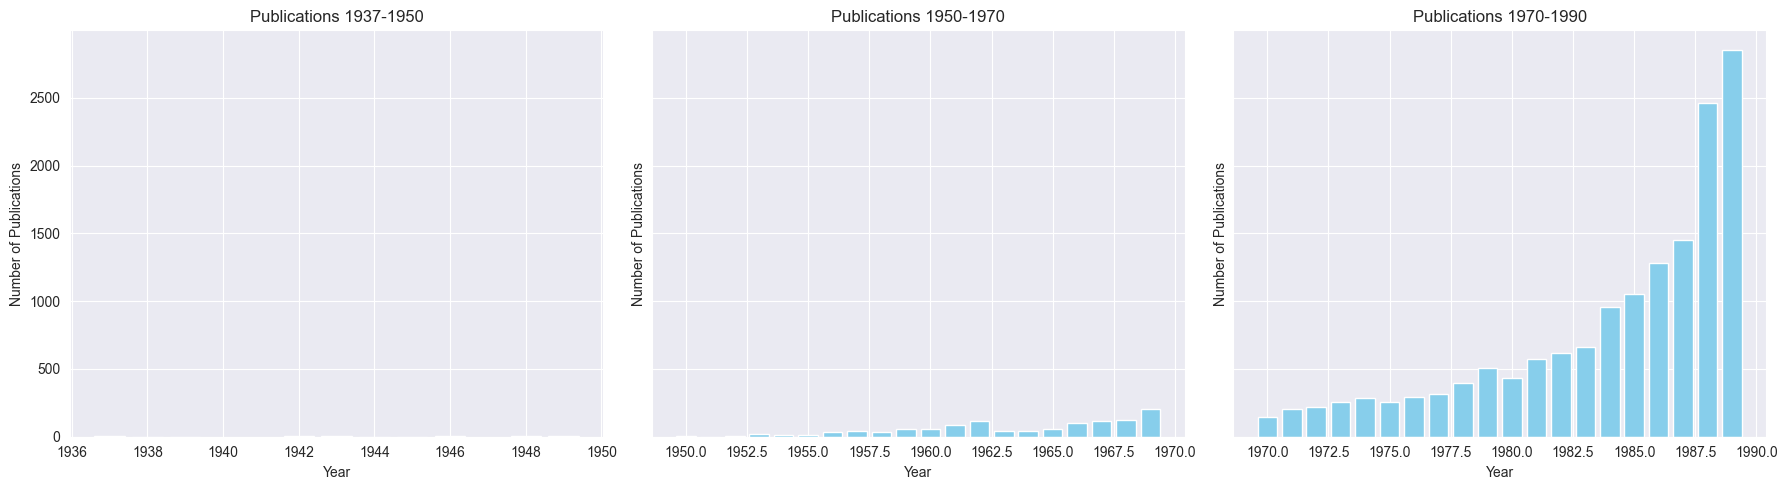

In [82]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("dblp-v10.csv")

# Define year ranges
year_ranges = [(1937, 1950), (1950, 1970), (1970, 1990)]

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

# Generate bar charts for each year range
for i, (start, end) in enumerate(year_ranges):
    subset = df[(df['year'] >= start) & (df['year'] < end)]
    year_counts = subset['year'].value_counts().sort_index()

    axes[i].bar(year_counts.index, year_counts.values, color='skyblue')
    axes[i].set_title(f"Publications {start}-{end}")
    axes[i].set_xlabel("Year")
    axes[i].set_ylabel("Number of Publications")

plt.tight_layout()
plt.show()


# Part 1.1.2
Plotting the bar chart of number of references over the year.

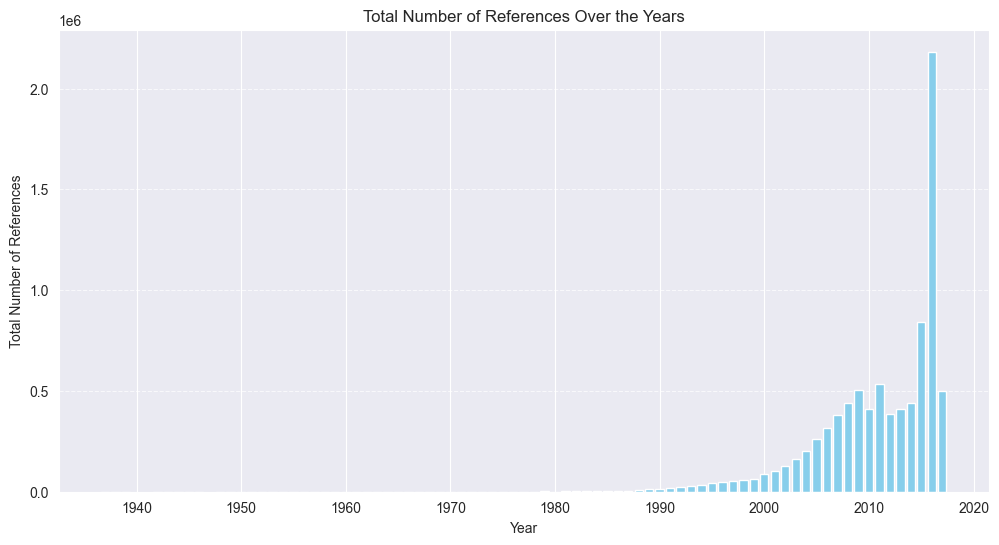

In [20]:
import pandas as pd
import ast
import matplotlib.pyplot as plt


# Convert references column from string to list (if stored as a string)
df['references'] = df['references'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Count the number of references for each paper
df['num_references'] = df['references'].apply(lambda x: len(x) if isinstance(x, list) else 0)

# Group by year and sum the number of references
yearly_references = df.groupby('year')['num_references'].sum()

# Plot bar chart
plt.figure(figsize=(12, 6))
plt.bar(yearly_references.index, yearly_references.values, color='skyblue')
plt.xlabel("Year")
plt.ylabel("Total Number of References")
plt.title("Total Number of References Over the Years")
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


# Part 1.1.3
Plotting the bar chart of total number of authors over the year.

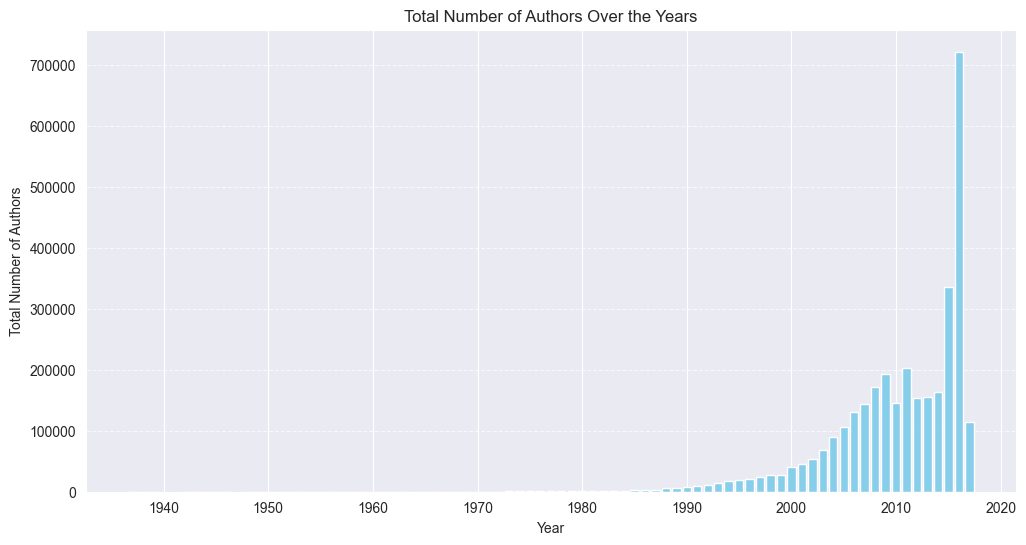

In [21]:
# Part 1.1.3
import pandas as pd
import ast
import matplotlib.pyplot as plt

# Convert authors column from string to list (if stored as a string)
df['authors'] = df['authors'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Count the number of authors for each paper
df['num_authors'] = df['authors'].apply(lambda x: len(x) if isinstance(x, list) else 0)

# Group by year and sum the number of authors
yearly_authors = df.groupby('year')['num_authors'].sum()

# Plot bar chart
plt.figure(figsize=(12, 6))
plt.bar(yearly_authors.index, yearly_authors.values, color='skyblue')
plt.xlabel("Year")
plt.ylabel("Total Number of Authors")
plt.title("Total Number of Authors Over the Years")
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


# Part 1.1.4
The Pearson correlation coefficient and the Spearman Rank correlation coefficient between the number of authors and the number of references.

In [7]:
# Part 1.1.4
from scipy.stats import pearsonr, spearmanr

# Convert authors and references columns from string to list (if stored as a string)
df['authors'] = df['authors'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
df['references'] = df['references'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Count the number of authors and references for each paper
df['num_authors'] = df['authors'].apply(lambda x: len(x) if isinstance(x, list) else 0)
df['num_references'] = df['references'].apply(lambda x: len(x) if isinstance(x, list) else 0)

# Calculate Pearson correlation coefficient
pearson_corr, _ = pearsonr(df['num_authors'], df['num_references'])

# Calculate Spearman Rank correlation coefficient
spearman_corr, _ = spearmanr(df['num_authors'], df['num_references'])

# Print results
print(f"Pearson correlation coefficient: {pearson_corr}")
print(f"Spearman Rank correlation coefficient: {spearman_corr}")


Pearson correlation coefficient: 0.05602787837523781
Spearman Rank correlation coefficient: 0.08721166558304991


# Part 1.1.2
The Pearson and Spearman correlation coefficient between the number of authors and number of citations.

In [8]:
# Part 1.1.5
import pandas as pd
import ast
from scipy.stats import pearsonr, spearmanr


# Convert authors column from string to list (if stored as a string)
df['authors'] = df['authors'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Count the number of authors for each paper
df['num_authors'] = df['authors'].apply(lambda x: len(x) if isinstance(x, list) else 0)

# Pearson correlation between the number of authors and the number of citations
pearson_corr, _ = pearsonr(df['num_authors'], df['n_citation'])

# Spearman Rank correlation between the number of authors and the number of citations
spearman_corr, _ = spearmanr(df['num_authors'], df['n_citation'])

# Print results
print(f"Pearson correlation coefficient: {pearson_corr}")
print(f"Spearman Rank correlation coefficient: {spearman_corr}")


Pearson correlation coefficient: -0.0027965270825158466
Spearman Rank correlation coefficient: -0.016616060491499426


# Part 1.1.6
 Bar chart of the title length over the years.

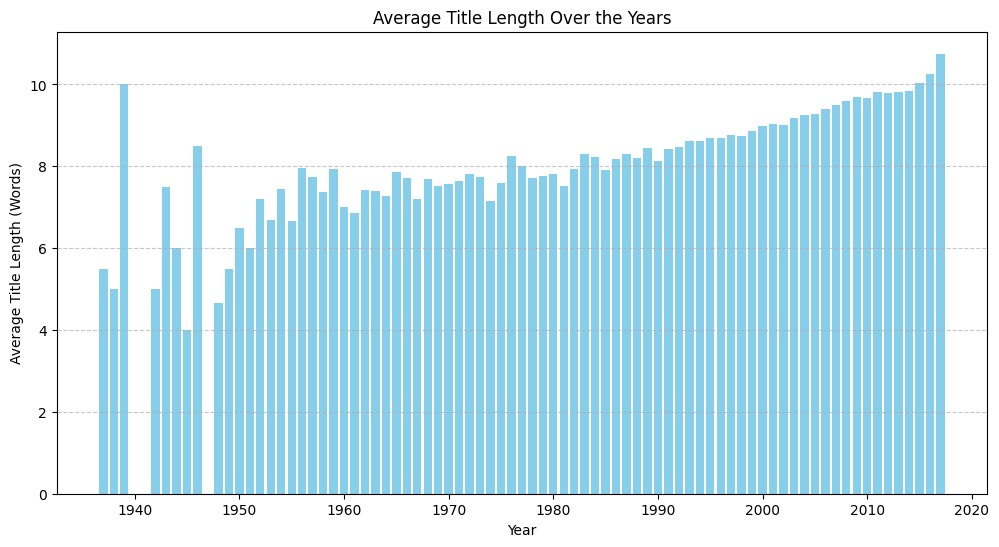

In [11]:
# Part 1.1.6

# Compute title length (number of words)
df['title_length'] = df['title'].astype(str).apply(lambda x: len(x.split()))

# Group by year and compute the average title length per year
yearly_title_length = df.groupby('year')['title_length'].mean()

# Plot bar chart
plt.figure(figsize=(12, 6))
plt.bar(yearly_title_length.index, yearly_title_length.values, color='skyblue')
plt.xlabel("Year")
plt.ylabel("Average Title Length (Words)")
plt.title("Average Title Length Over the Years")
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


# Part 1.1.7
 Wordcloud of the abstracts.

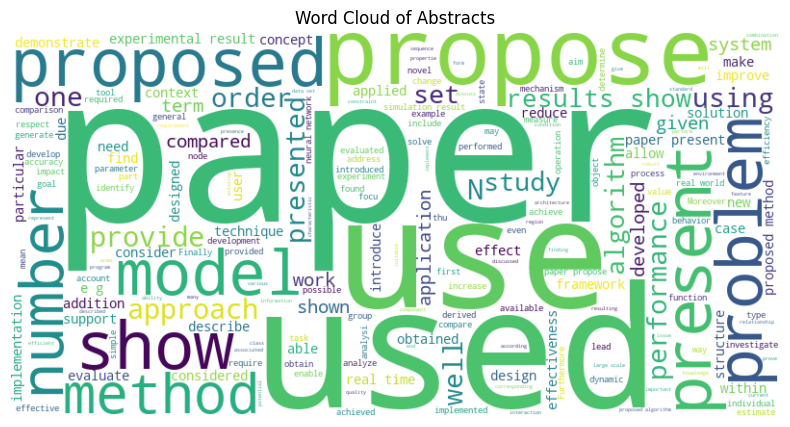

In [6]:
# Part 1.1.7

from wordcloud import WordCloud

# Combine all abstracts into a single text string
text = " ".join(df['abstract'].dropna().astype(str))

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text)

# Display word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Abstracts")
plt.show()


# Part 1.1.8
Pearson correlation and Spearman Rank correlation between the tilte length of the aper and its references.

In [7]:
# Part 1.1.8
import ast
from scipy.stats import pearsonr, spearmanr

# Convert references column from string to list (if stored as a string)
df['references'] = df['references'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Compute title length (number of words)
df['title_length'] = df['title'].astype(str).apply(lambda x: len(x.split()))

# Create a dictionary mapping paper ID to its title length
title_length_dict = dict(zip(df['id'], df['title_length']))

# Compute the average title length of referenced papers
def avg_referenced_title_length(refs):
    if isinstance(refs, list) and refs:
        ref_lengths = [title_length_dict.get(ref, None) for ref in refs]
        ref_lengths = [l for l in ref_lengths if l is not None]  # Remove missing references
        return sum(ref_lengths) / len(ref_lengths) if ref_lengths else None
    return None

df['avg_ref_title_length'] = df['references'].apply(avg_referenced_title_length)

# Drop rows with NaN values (papers with no valid references)
df_clean = df.dropna(subset=['avg_ref_title_length'])

# Compute Pearson correlation
pearson_corr, _ = pearsonr(df_clean['title_length'], df_clean['avg_ref_title_length'])

# Compute Spearman correlation
spearman_corr, _ = spearmanr(df_clean['title_length'], df_clean['avg_ref_title_length'])

# Print results
print(f"Pearson correlation coefficient: {pearson_corr}")
print(f"Spearman Rank correlation coefficient: {spearman_corr}")


Pearson correlation coefficient: 0.2567545853941142
Spearman Rank correlation coefficient: 0.25842330916482636


# Part 1.1.9
Top 10 authors with the most publications.


In [9]:
# Part 1.1.9
# Convert authors column from string to list (if stored as a string)
df['authors'] = df['authors'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Flatten the list of authors and count occurrences
author_counts = {}

for authors in df['authors'].dropna():
    if isinstance(authors, list):
        for author in authors:
            author_counts[author] = author_counts.get(author, 0) + 1

# Convert to DataFrame and get top 10 authors
top_authors = pd.DataFrame(author_counts.items(), columns=['Author', 'Publication Count'])
top_authors = top_authors.sort_values(by='Publication Count', ascending=False).head(10)

# Display the top 10 authors
print(top_authors)


           Author  Publication Count
4350     Wei Wang                950
417     Wei Zhang                657
8506     Yang Liu                629
2003    Lei Zhang                579
2817       Wei Li                559
6871     Jun Wang                544
6471     Lei Wang                519
3266  Lajos Hanzo                458
2980      Wei Liu                456
6905    Jun Zhang                455


# Part 1.1.10
Top 10 authors with the most citations.

In [10]:
# Part 1.1.10
# Convert authors column from string to list (if stored as a string)
df['authors'] = df['authors'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Initialize a dictionary to store author citation counts
author_citations = {}

# Iterate over each paper and its authors, accumulating citations for each author
for index, row in df.iterrows():
    citation_count = row['n_citation']
    authors = row['authors']
    if isinstance(authors, list):
        for author in authors:
            author_citations[author] = author_citations.get(author, 0) + citation_count

# Convert to DataFrame and get top 10 authors by citations
top_authors_citations = pd.DataFrame(author_citations.items(), columns=['Author', 'Total Citations'])
top_authors_citations = top_authors_citations.sort_values(by='Total Citations', ascending=False).head(10)

# Display the top 10 authors with the most citations
print(top_authors_citations)


                  Author  Total Citations
76064      David G. Lowe            65344
10470  Hari Balakrishnan            55096
66231      Scott Shenker            54164
5468     Ian F. Akyildiz            53654
4582   Michael I. Jordan            53448
13263         Ion Stoica            52890
9141        Chih-Jen Lin            52302
3905        Takeo Kanade            50743
37768     Deborah Estrin            49925
547      Vladimir Vapnik            49755


# Part 1.1.11
Top 10 papers with the most references.

In [12]:
# Part 1.1.11
# Convert references column from string to list (if stored as a string)
df['references'] = df['references'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Count the number of references for each paper
df['num_references'] = df['references'].apply(lambda x: len(x) if isinstance(x, list) else 0)

# Sort the papers by the number of references and get the top 10
top_papers_references = df[['title', 'num_references']].sort_values(by='num_references', ascending=False).head(10)

# Display the top 10 papers with the most references
print(top_papers_references)


                                                    title  num_references
371369  Comprehensive frequency-dependent substrate no...             759
780292                    Time in Qualitative Simulation.             561
104143                  Bibliography on cyclostationarity             412
214646  Fifty Years of MIMO Detection: The Road to Lar...             396
484969  An Exploration of Enterprise Architecture Rese...             394
223901  Structure and dynamics of molecular networks: ...             386
302124       The NP-completeness column: An ongoing guide             363
707510                                   Digital geometry             361
325083            Deep Learning: Methods and Applications             343
538381  Review: learning bayesian networks: Approaches...             326


# Part 1.1.12
Top 10 papers with the most citations.

In [13]:
# Part 1.1.12
# Sort the papers by the number of citations and get the top 10
top_papers_citations = df[['title', 'n_citation']].sort_values(by='n_citation', ascending=False).head(10)

# Display the top 10 papers with the most citations
print(top_papers_citations)


                                                    title  n_citation
332760  Distinctive Image Features from Scale-Invarian...       42508
294527  Bowling alone: the collapse and revival of Ame...       34288
358174      LIBSVM: A library for support vector machines       33016
716671                                     Random Forests       28679
18485                             Support-Vector Networks       26114
45248   MapReduce: simplified data processing on large...       24381
81801   A fast and elitist multiobjective genetic algo...       24245
150727  A theory for multiresolution signal decomposit...       24182
458466  ImageNet Classification with Deep Convolutiona...       22884
442067  Histograms of oriented gradients for human det...       22795


# Part 1.1.13
Training a regressor model to predict the number of citations based on the number of publications.


In [15]:
# Part 1.1.13
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Convert authors column from string to list (if stored as a string)
df['authors'] = df['authors'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Initialize dictionaries to store author publication and citation counts
author_publications = {}
author_citations = {}

# Iterate over each paper and accumulate the publication count and citation count for each author
for index, row in df.iterrows():
    citation_count = row['n_citation']
    authors = row['authors']
    if isinstance(authors, list):
        for author in authors:
            author_publications[author] = author_publications.get(author, 0) + 1
            author_citations[author] = author_citations.get(author, 0) + citation_count

# Convert the data to DataFrame for regression
author_data = pd.DataFrame({
    'Author': list(author_publications.keys()),
    'Num_Publications': list(author_publications.values()),
    'Total_Citations': list(author_citations.values())
})

# Drop authors with no publications or citations
author_data = author_data[author_data['Num_Publications'] > 0]

# Define features (X) and target (y)
X = author_data[['Num_Publications']]
y = author_data['Total_Citations']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the results
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 214799.82341304657
R-squared: 0.3558588818875599


# Part 1.2.1.1
Plotting the clustering coefficient for the nodes of different years. Just %10 of the dataset was used due to the computational limitations.

C:\Users\HP\AppData\Local\Temp\ipykernel_17488\887335458.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['references'] = df['references'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
C:\Users\HP\AppData\Local\Temp\ipykernel_17488\887335458.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clustering_coefficient'] = df['id'].apply(lambda x: clustering_coeffs.get(x, 0))


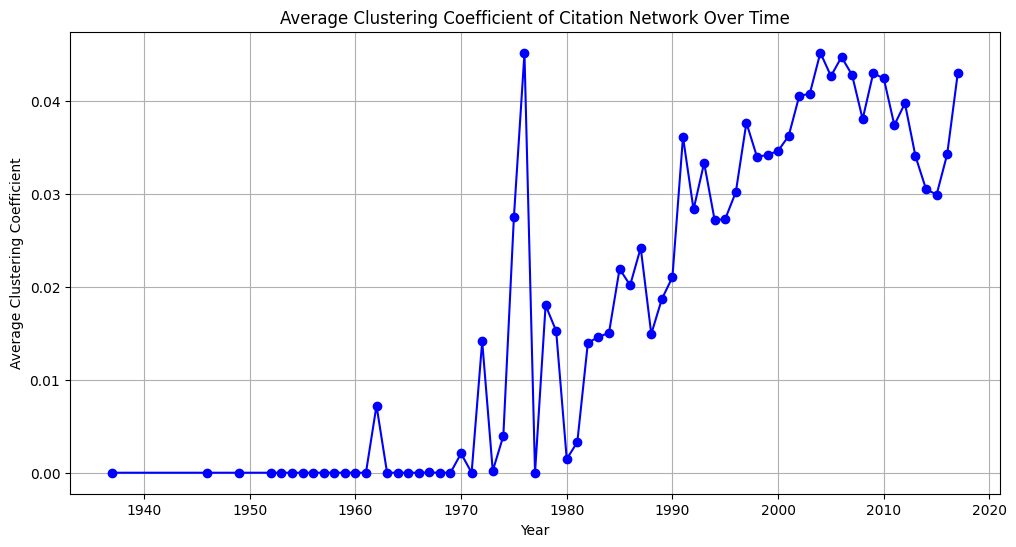

In [30]:
# Part 1.2.1.1
import networkx as nx
import matplotlib.pyplot as plt


# # Select the first 100,000 rows
df1 = df.head(100000)

# Convert references column from string to list (if stored as a string)
df1['references'] = df1['references'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Initialize a dictionary to store the citation network (paper -> referenced papers)
citation_network = {}

# Populate the citation network (nodes are papers, edges are citations)
for _, row in df1.iterrows():
    paper_id = row['id']
    references = row['references']
    if isinstance(references, list):  # Only proceed if references is a list
        citation_network[paper_id] = references
    else:
        citation_network[paper_id] = []  # Assign an empty list if references is NaN or not a list

# Initialize NetworkX graph
G = nx.DiGraph()

# Add nodes (papers) to the graph
for paper_id in citation_network.keys():
    G.add_node(paper_id)

# Add edges (citations) to the graph
for paper_id, references in citation_network.items():
    for ref in references:
        if ref in citation_network:  # Make sure the referenced paper exists in the network
            G.add_edge(paper_id, ref)

# Compute clustering coefficients for the entire network
clustering_coeffs = nx.clustering(G.to_undirected())

# Add clustering coefficients to the DataFrame for each paper
df1['clustering_coefficient'] = df1['id'].apply(lambda x: clustering_coeffs.get(x, 0))

# Drop rows with NaN values in the clustering_coefficient column
df_clean = df.dropna(subset=['clustering_coefficient'])

# Group by year and compute average clustering coefficient for each year
yearly_clustering = df_clean.groupby('year')['clustering_coefficient'].mean()

# Plot the clustering coefficient over time
plt.figure(figsize=(12, 6))
plt.plot(yearly_clustering.index, yearly_clustering.values, marker='o', color='b', linestyle='-', markersize=6)
plt.xlabel('Year')
plt.ylabel('Average Clustering Coefficient')
plt.title('Average Clustering Coefficient of Citation Network Over Time')
plt.grid(True)
plt.show()


# Part 1.2.1.2
The average path length and diameter of graph.
* First the largest strongly connected part of the graph is detected.
* Second the average path length and diameter are calculated for that.

In [52]:
# Part 1.2.1.2
import networkx as nx

# Select the first 10,000 rows
#df = df.head(50000)

# Convert references column from string to list (if stored as a string)
df['references'] = df['references'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Initialize a dictionary to store the citation network (paper -> referenced papers)
citation_network = {}

# Populate the citation network (nodes are papers, edges are citations)
for _, row in df.iterrows():
    paper_id = row['id']
    references = row['references']
    if isinstance(references, list):  # Only proceed if references is a list
        citation_network[paper_id] = references
    else:
        citation_network[paper_id] = []  # Assign an empty list if references is NaN or not a list

# Initialize NetworkX graph as undirected
G = nx.Graph()

# Add nodes (papers) to the graph
for paper_id in citation_network.keys():
    G.add_node(paper_id)

# Add edges (citations) to the graph
for paper_id, references in citation_network.items():
    for ref in references:
        if ref in citation_network:  # Make sure the referenced paper exists in the network
            G.add_edge(paper_id, ref)

# Find connected components (since the graph is undirected, we're looking for connected components)
connected_components = list(nx.connected_components(G))
print(f"Number of connected components: {len(connected_components)}")

# Find the largest connected component
largest_cc = max(connected_components, key=len)
print(f"Largest connected component size: {len(largest_cc)}")

# Create subgraph of the largest connected component
G_cc = G.subgraph(largest_cc)

# Compute average path length and diameter for the largest connected component
try:
    avg_path_length = nx.average_shortest_path_length(G_cc)
    print(f"Average Path Length (Largest Connected Component): {avg_path_length}")

    diameter = nx.diameter(G_cc)
    print(f"Diameter (Largest Connected Component): {diameter}")
except nx.NetworkXError as e:
    print(f"Error calculating path length or diameter: {e}")


Number of connected components: 36625
Largest connected component size: 7264
Average Path Length (Largest Connected Component): 14.0690121723102
Diameter (Largest Connected Component): 47


# Part 1.2.1.3
Influential papers are detected using the PageRank.

In [58]:
# Part 1.2.1.3
# Select the first 100,000 rows
df1 = df.head(100000)

# Convert references column from string to list (if stored as a string)
df1['references'] = df1['references'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Initialize a dictionary to store the citation network (paper -> referenced papers)
citation_network = {}

# Populate the citation network (nodes are papers, edges are citations)
for _, row in df1.iterrows():
    paper_id = row['id']
    references = row['references']
    if isinstance(references, list):  # Only proceed if references is a list
        citation_network[paper_id] = references
    else:
        citation_network[paper_id] = []  # Assign an empty list if references is NaN or not a list

# Initialize NetworkX graph
G = nx.DiGraph()

# Add nodes (papers) to the graph
for paper_id in citation_network.keys():
    G.add_node(paper_id)

# Add edges (citations) to the graph
for paper_id, references in citation_network.items():
    for ref in references:
        if ref in citation_network:  # Make sure the referenced paper exists in the network
            G.add_edge(paper_id, ref)

# Compute PageRank
pagerank_scores = nx.pagerank(G, alpha=0.85)

# Sort papers by their PageRank scores
sorted_papers = sorted(pagerank_scores.items(), key=lambda x: x[1], reverse=True)

# Top 10 influential papers by PageRank
top_10_papers = sorted_papers[:10]

# Display the top 10 influential papers
print("Top 10 Influential Papers by PageRank:")
for paper_id, score in top_10_papers:
    print(f"Paper ID: {paper_id}, PageRank Score: {score}")


C:\Users\HP\AppData\Local\Temp\ipykernel_17488\1922968073.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['references'] = df1['references'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)


Top 10 Influential Papers by PageRank:
Paper ID: 4c36f482-1f7d-4a6c-a6f9-2e0a5b7056a4, PageRank Score: 0.0019383514234605748
Paper ID: 50dd56db-151d-4d62-8576-65f0ef6f381b, PageRank Score: 0.0014937810880258282
Paper ID: 62549bc2-e0b3-46e8-8d32-390dded105d5, PageRank Score: 0.0014491908177845566
Paper ID: 60fb0dc2-bde3-4714-948e-de0ed12ab460, PageRank Score: 0.0014052656513565424
Paper ID: 5ebbd1f5-dfe5-4eec-9883-b8b5efea366c, PageRank Score: 0.0012760930618373727
Paper ID: 59084791-6ebd-4d0d-8f93-2c1da8d47490, PageRank Score: 0.001274717240776334
Paper ID: 6a752c9f-ffff-45ad-8f7c-40462599d861, PageRank Score: 0.0011201419172548565
Paper ID: 4db6c10f-b1bb-49c2-b00c-bca8425aa979, PageRank Score: 0.0010940381728222197
Paper ID: 56f4b72a-ec39-47ac-8220-899296e7fb18, PageRank Score: 0.0009386604777033894
Paper ID: 60190e83-16e8-4f2c-a068-b63873a01507, PageRank Score: 0.0009028271806728086


# Part 1.2.2.1
The network density for author-author network is calculated for the years 1920,1950,1970,1990,2010 and 2017.


C:\Users\HP\AppData\Local\Temp\ipykernel_17488\1488188016.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['references'] = df1['references'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)


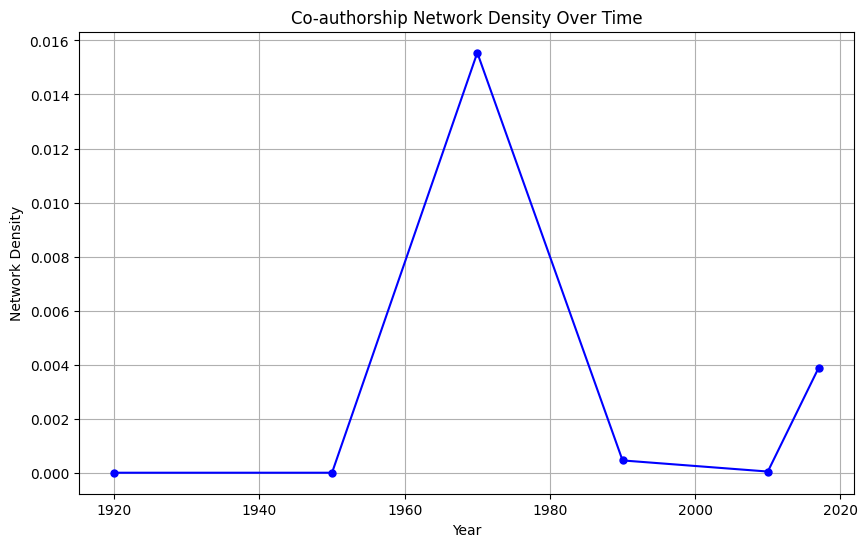

In [72]:
# Part 1.2.2.1
# Select the first 500,000 rows (or any specific range)
df1 = df.head(500000)

# Convert references column from string to list (if stored as a string)
df1['references'] = df1['references'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Initialize a dictionary to store the co-authorship network (author -> co-authors)
coauthorship_network = {}

# Populate the co-authorship network (nodes are authors, edges are co-authorships)
for _, row in df1.iterrows():
    if(',' in row['authors']):
        authors = row['authors'].split(",")  # Assuming authors are separated by commas in the 'authors' column
        for author in authors:
            author = author.strip()  # Remove extra spaces
            if author not in coauthorship_network:
                coauthorship_network[author] = set()

            # Add co-authorships
            for co_author in authors:
                co_author = co_author.strip()
                if co_author != author:
                    coauthorship_network[author].add(co_author)

# Create a function to compute network density for a given year
def compute_network_density(year):
    # Filter papers for the given year
    year_papers = df1[df1['year'] == year]

    # Initialize NetworkX graph for the given year
    G = nx.Graph()

    # Add nodes (authors)
    for _, row in year_papers.iterrows():
        if(',' in row['authors']):
            authors = row['authors'].split(",")  # Assuming authors are separated by commas in the 'authors' column
            for author in authors:
                author = author.strip()
                if author not in G:
                    G.add_node(author)

        # Add edges (co-authorships)
            for i, author1 in enumerate(authors):
                author1 = author1.strip()
                for author2 in authors[i+1:]:
                    author2 = author2.strip()
                    G.add_edge(author1, author2)

    # Compute the network density
    num_edges = G.number_of_edges()
    num_nodes = G.number_of_nodes()
    max_possible_edges = num_nodes * (num_nodes - 1) / 2  # Maximum edges for an undirected graph

    # Return density (actual edges / maximum possible edges)
    if max_possible_edges > 0:
        return num_edges / max_possible_edges
    else:
        return 0

# List of years to analyze (can be modified to cover the range you're interested in)
years = [1920,1950,1970,1990,2010,2017]

# Compute network density for each year
densities = [compute_network_density(year) for year in years]

# Plot the network density over the years
plt.figure(figsize=(10, 6))
plt.plot(years, densities, marker='o', color='b', linestyle='-', markersize=5)
plt.xlabel("Year")
plt.ylabel("Network Density")
plt.title("Co-authorship Network Density Over Time")
plt.grid(True)
plt.show()


# Part 1.2.2.2
Influential researchers are determined by the 3 different mentioned methods. Just %1 of data are used due to computational limitations.

C:\Users\HP\AppData\Local\Temp\ipykernel_17488\2686354776.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['references'] = df1['references'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)


Top 10 by Degree Centrality:
[("['Katrin Amunts'", 0.0029915240152900116), ("'D. C. Van Essen'", 0.0029915240152900116), ("'Peter A. Tass'", 0.0029915240152900116), ("'S.L. Hill'", 0.0029915240152900116), ("'Karl Zilles'", 0.0029915240152900116), ("'Michael Hawrylycz'", 0.0029915240152900116), ("'J.D. Van Horn'", 0.0029915240152900116), ("'S. Dehaene'", 0.0029915240152900116), ("'P. Valdes-Sosa'", 0.0029915240152900116), ("'Noam Harel'", 0.0029915240152900116)]
Top 10 by Betweenness Centrality:
[("'Yan Li'", 3.6465829087090125e-06), ("'Hong Mei']", 3.149321602975965e-06), ("['Bo Wang'", 2.6520602972429183e-06), ("['Xin Fan'", 2.4863065286652357e-06), ("'Xing Xie'", 2.4863065286652357e-06), ("'Chunyan Wang']", 2.3205527600875536e-06), ("'Wei Zhang'", 2.154798991509871e-06), ("'Lei Zhang'", 1.7680401981619455e-06), ("'Shuicheng Yan'", 1.4917839171991415e-06), ("'Wing Hung Wong']", 1.4917839171991415e-06)]
Top 10 by Closeness Centrality:
[("['Katrin Amunts'", 0.0029915240152900116), ("'D.

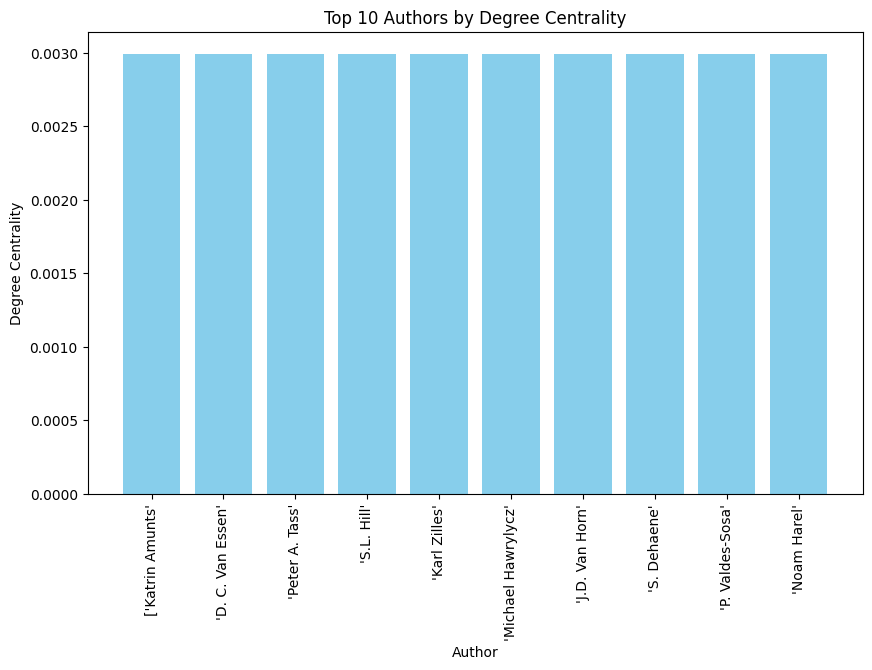

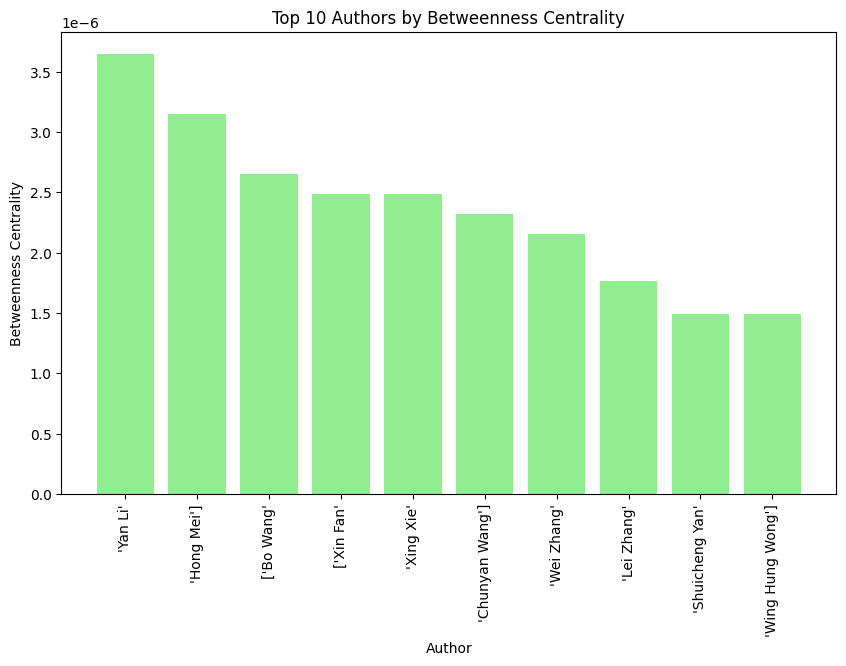

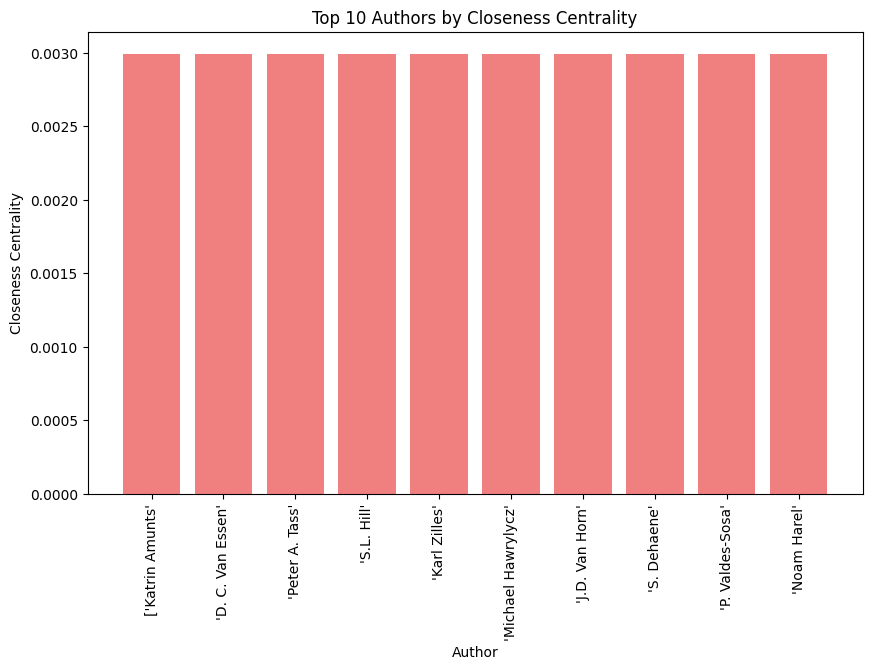

In [91]:
# Part 1.2.2.2
import networkx as nx
import matplotlib.pyplot as plt

# Select the first 10,000 rows (or a specific range)
df1 = df.head(2000)

# Convert references column from string to list (if stored as a string)
df1['references'] = df1['references'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Create a co-authorship network (Author-Author Network)
coauthorship_network = {}

# Populate the co-authorship network (nodes are authors, edges are co-authorships)
for _, row in df1.iterrows():
    authors = row['authors'].split(",")  # Assuming authors are separated by commas in the 'authors' column
    for author in authors:
        author = author.strip()  # Remove extra spaces
        if author not in coauthorship_network:
            coauthorship_network[author] = set()

        # Add co-authorships
        for co_author in authors:
            co_author = co_author.strip()
            if co_author != author:
                coauthorship_network[author].add(co_author)

# Create NetworkX Graph (undirected)
G = nx.Graph()

# Add nodes (authors) and edges (co-authorships)
for author, co_authors in coauthorship_network.items():
    G.add_node(author)
    for co_author in co_authors:
        G.add_edge(author, co_author)

# Compute Degree Centrality
degree_centrality = nx.degree_centrality(G)
top_degree = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
print("Top 10 by Degree Centrality:")
print(top_degree)

# Compute Betweenness Centrality
betweenness_centrality = nx.betweenness_centrality(G)
top_betweenness = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
print("Top 10 by Betweenness Centrality:")
print(top_betweenness)

# Compute Closeness Centrality
closeness_centrality = nx.closeness_centrality(G)
top_closeness = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
print("Top 10 by Closeness Centrality:")
print(top_closeness)

# Visualizing centrality scores
# Top 10 degree centrality authors
degree_nodes = [node for node, _ in top_degree]
degree_scores = [score for _, score in top_degree]

# Top 10 betweenness centrality authors
betweenness_nodes = [node for node, _ in top_betweenness]
betweenness_scores = [score for _, score in top_betweenness]

# Top 10 closeness centrality authors
closeness_nodes = [node for node, _ in top_closeness]
closeness_scores = [score for _, score in top_closeness]

# Plot degree centrality
plt.figure(figsize=(10, 6))
plt.bar(degree_nodes, degree_scores, color='skyblue')
plt.title("Top 10 Authors by Degree Centrality")
plt.xlabel("Author")
plt.ylabel("Degree Centrality")
plt.xticks(rotation=90)
plt.show()

# Plot betweenness centrality
plt.figure(figsize=(10, 6))
plt.bar(betweenness_nodes, betweenness_scores, color='lightgreen')
plt.title("Top 10 Authors by Betweenness Centrality")
plt.xlabel("Author")
plt.ylabel("Betweenness Centrality")
plt.xticks(rotation=90)
plt.show()

# Plot closeness centrality
plt.figure(figsize=(10, 6))
plt.bar(closeness_nodes, closeness_scores, color='lightcoral')
plt.title("Top 10 Authors by Closeness Centrality")
plt.xlabel("Author")
plt.ylabel("Closeness Centrality")
plt.xticks(rotation=90)
plt.show()


# Part 1.2.2.3
Louvain algorithm is used for the communty detection. Just %1 of data is used for better visualization.

C:\Users\HP\AppData\Local\Temp\ipykernel_17488\2775376910.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['references'] = df1['references'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)


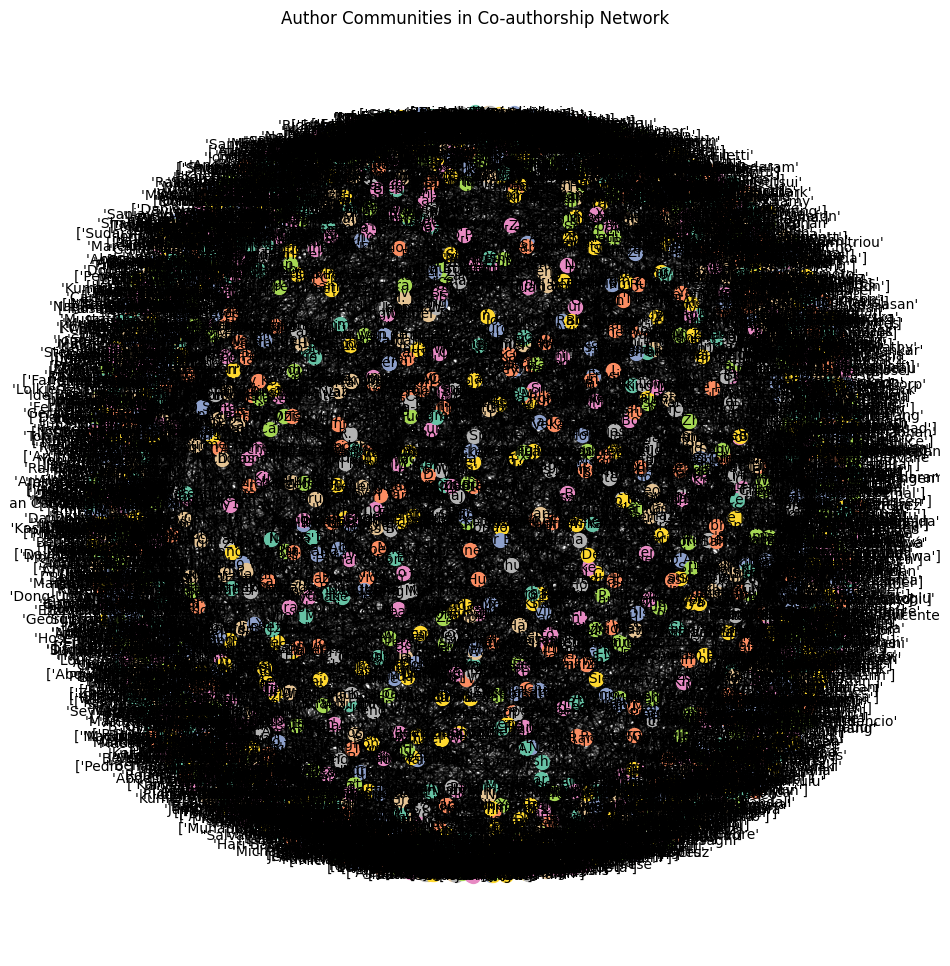

                       Community
['S. Ben Jabra'                0
'Ezzeddine Zagrouba']          0
['Joaquín J. Torres'           1
'Joaquín Marro'                1
'Jesús M. Cortés'              1


In [86]:
# Part 1.2.2.3
import math
import community as community_louvain  # Louvain community detection
import matplotlib.pyplot as plt
import seaborn as sns


# Select the first 10,000 rows (or a specific range)
df1 = df.head(1000)

# Convert references column from string to list (if stored as a string)
df1['references'] = df1['references'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Create a co-authorship network (Author-Author Network)
coauthorship_network = {}

# Populate the co-authorship network (nodes are authors, edges are co-authorships)
for _, row in df1.iterrows():
    if(type(row['authors'])!=float):
        authors = row['authors'].split(",")  # Assuming authors are separated by commas in the 'authors' column
        for author in authors:
            author = author.strip()  # Remove extra spaces
            if author not in coauthorship_network:
                coauthorship_network[author] = set()

            # Add co-authorships
            for co_author in authors:
                co_author = co_author.strip()
                if co_author != author:
                    coauthorship_network[author].add(co_author)

# Create NetworkX Graph (undirected)
G = nx.Graph()

# Add nodes (authors) and edges (co-authorships)
for author, co_authors in coauthorship_network.items():
    G.add_node(author)
    for co_author in co_authors:
        G.add_edge(author, co_author)

# Apply Louvain method to detect communities
partition = community_louvain.best_partition(G)

# Visualize the communities

# Get unique communities
communities = set(partition.values())

# Set up a color map for the communities
colors = sns.color_palette("Set2", len(communities))

# Create a plot to visualize the graph with communities
plt.figure(figsize=(12, 12))

# Position the nodes using the spring layout
pos = nx.spring_layout(G, k=0.5, iterations=50)

# Draw the nodes and edges
for community_num in communities:
    nodes_in_community = [node for node, comm in partition.items() if comm == community_num]
    nx.draw_networkx_nodes(G, pos, nodes_in_community, node_size=100, node_color=[colors[community_num % len(colors)]], label=f'Community {community_num}')

# Draw edges
nx.draw_networkx_edges(G, pos, alpha=0.5)

# Add labels for nodes (optional, if you want to label them)
nx.draw_networkx_labels(G, pos, font_size=10, font_color='black')

# Display the plot
plt.title("Author Communities in Co-authorship Network")
plt.axis("off")
plt.show()

# Show the partition (community labels for each author)
community_labels = pd.DataFrame.from_dict(partition, orient="index", columns=["Community"])
print(community_labels.head())


# Part 1.2.3.1
Analysis of interdisciplinary collaborations between venues.

C:\Users\HP\AppData\Local\Temp\ipykernel_17488\2561569668.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['references'] = df1['references'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)


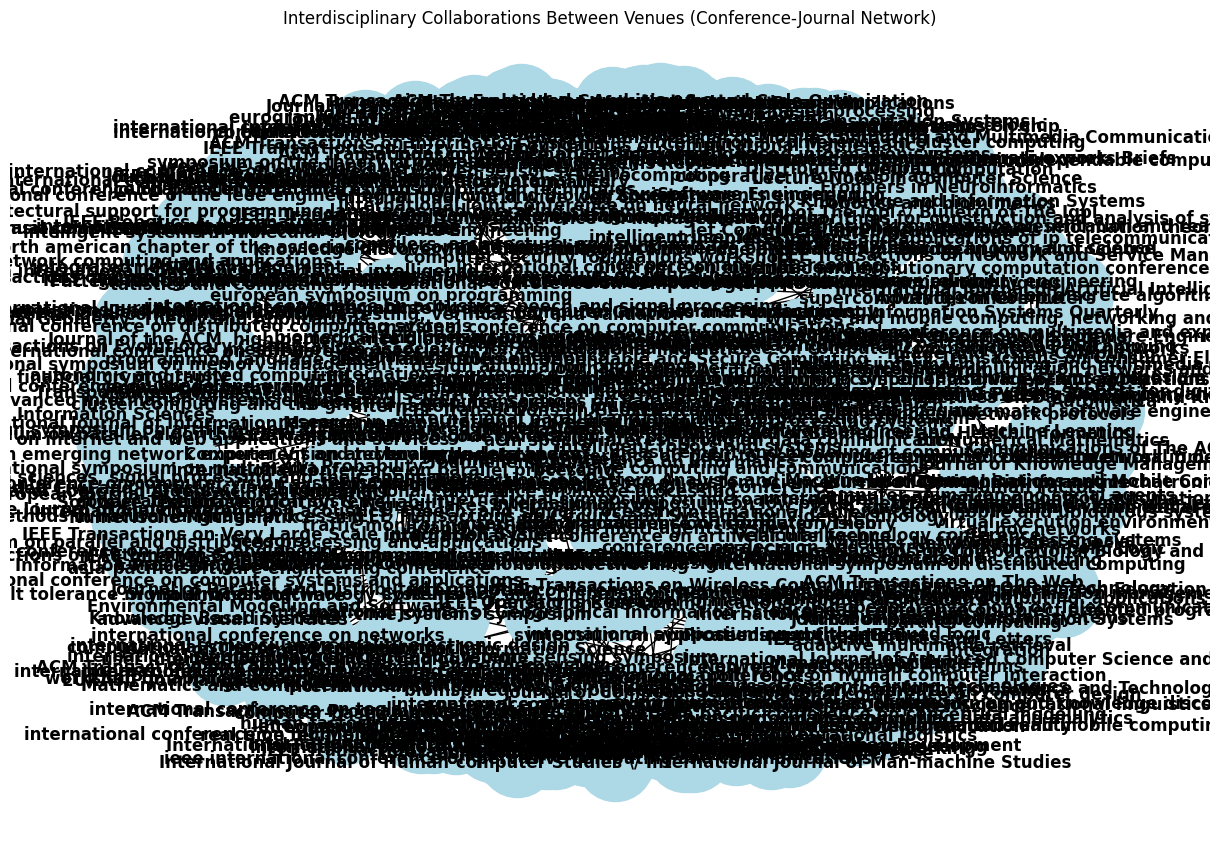

Number of connected components: 39


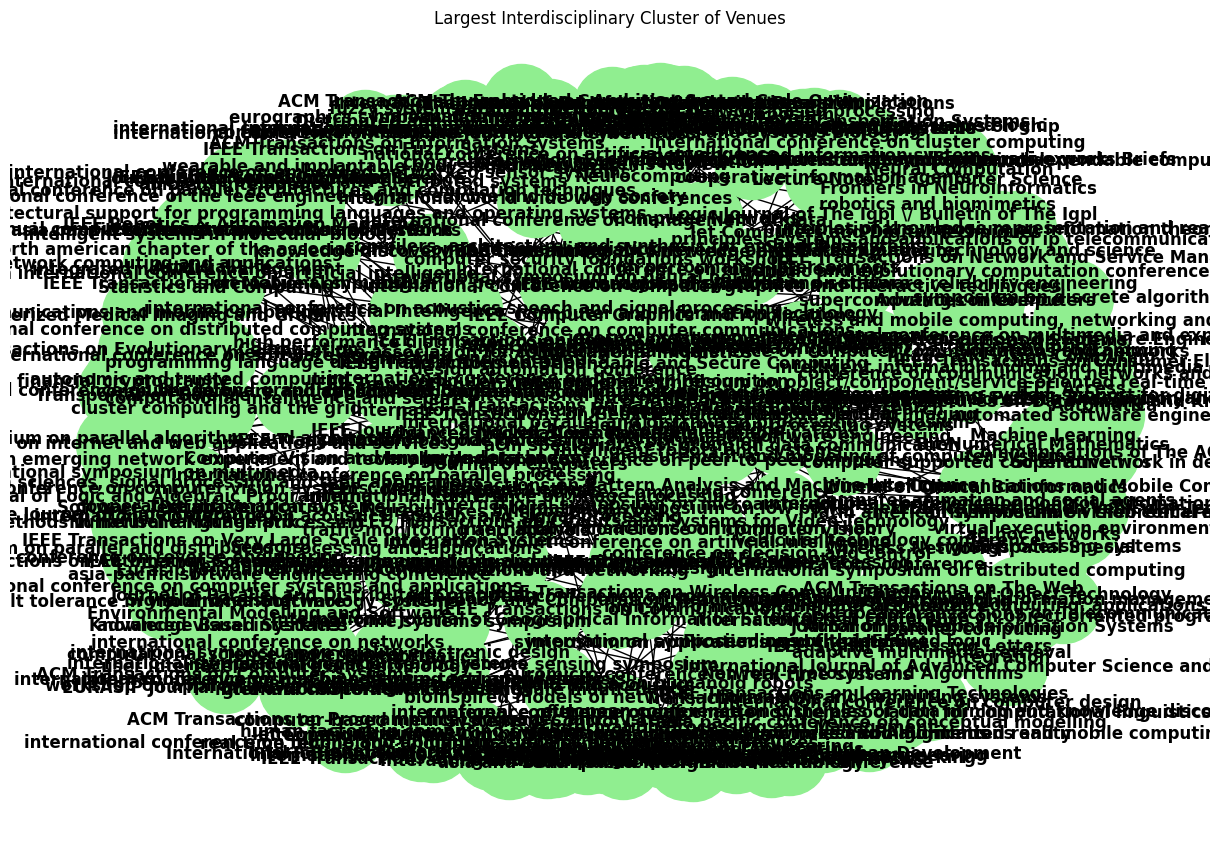

Top 10 Venues by Degree Centrality (Central Venues in Interdisciplinary Collaborations):
nan: 0.1084
IEEE\/ACM Transactions on Networking: 0.0747
computer vision and pattern recognition: 0.0361
ACM Computing Surveys: 0.0361
international joint conference on artificial intelligence: 0.0361
IEEE Transactions on Pattern Analysis and Machine Intelligence: 0.0337
design automation conference: 0.0337
IEEE Transactions on Parallel and Distributed Systems: 0.0289
IEEE Transactions on Image Processing: 0.0289
IEEE Transactions on Signal Processing: 0.0265


In [97]:
# Part 1.2.3.1
# Select the first 10,000 rows (or adjust as needed)
df1 = df.head(10000)

# Convert references column from string to list (if stored as a string)
df1['references'] = df1['references'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Create a venue network (Conference-Journal Network)
venue_network = {}

# Populate the venue network (nodes are venues, edges are citations between venues)
for _, row in df1.iterrows():
    paper_id = row['id']
    venue = row['venue']  # Assuming there is a 'venue' column for the conference/journal
    references = row['references']
    if(type(row['authors'])!=float and type(row['references'])!=float):
        for ref in references:
            ref_venue = df1[df1['id'] == ref]['venue'].values
            if ref_venue.size > 0 and ref_venue[0] != venue:  # If referenced paper has a different venue
                if venue not in venue_network:
                    venue_network[venue] = set()
                venue_network[venue].add(ref_venue[0])

# Create NetworkX Graph (undirected)
G = nx.Graph()

# Add nodes (venues) and edges (citations between different venues)
for venue, related_venues in venue_network.items():
    G.add_node(venue)
    for related_venue in related_venues:
        G.add_edge(venue, related_venue)

# Visualize the venue network
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, k=0.5, iterations=50)  # Layout for better visualization
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=3000, font_size=12, font_weight='bold')
plt.title("Interdisciplinary Collaborations Between Venues (Conference-Journal Network)")
plt.show()

# Analyze how interdisciplinary the network is by checking connected components
connected_components = list(nx.connected_components(G))
print(f"Number of connected components: {len(connected_components)}")

# You can visualize the largest connected component to see the major interdisciplinary clusters
largest_component = max(connected_components, key=len)
G_largest = G.subgraph(largest_component)

# Visualize the largest connected component
plt.figure(figsize=(12, 8))
nx.draw(G_largest, pos, with_labels=True, node_color='lightgreen', node_size=3000, font_size=12, font_weight='bold')
plt.title("Largest Interdisciplinary Cluster of Venues")
plt.show()

# Check for key venues that are central in terms of collaborations using degree centrality
degree_centrality = nx.degree_centrality(G)
top_degree = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
print("Top 10 Venues by Degree Centrality (Central Venues in Interdisciplinary Collaborations):")
for venue, centrality in top_degree:
    print(f"{venue}: {centrality:.4f}")


# Part 1.2.3.2
Finding the most influential venues using centrality metrics.

C:\Users\HP\AppData\Local\Temp\ipykernel_17488\430595015.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['references'] = df1['references'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)


Top 10 Venues by Degree Centrality:
nan: 0.1084
IEEE\/ACM Transactions on Networking: 0.0747
computer vision and pattern recognition: 0.0361
ACM Computing Surveys: 0.0361
international joint conference on artificial intelligence: 0.0361
IEEE Transactions on Pattern Analysis and Machine Intelligence: 0.0337
design automation conference: 0.0337
IEEE Transactions on Parallel and Distributed Systems: 0.0289
IEEE Transactions on Image Processing: 0.0289
IEEE Transactions on Signal Processing: 0.0265

Top 10 Venues by Betweenness Centrality:
nan: 0.3492
IEEE\/ACM Transactions on Networking: 0.1508
design automation conference: 0.0684
ACM Computing Surveys: 0.0657
IEEE Transactions on Parallel and Distributed Systems: 0.0637
international symposium on performance analysis of systems and software: 0.0634
IEEE Transactions on Pattern Analysis and Machine Intelligence: 0.0550
computer vision and pattern recognition: 0.0472
IEEE Transactions on Signal Processing: 0.0467
international joint confer

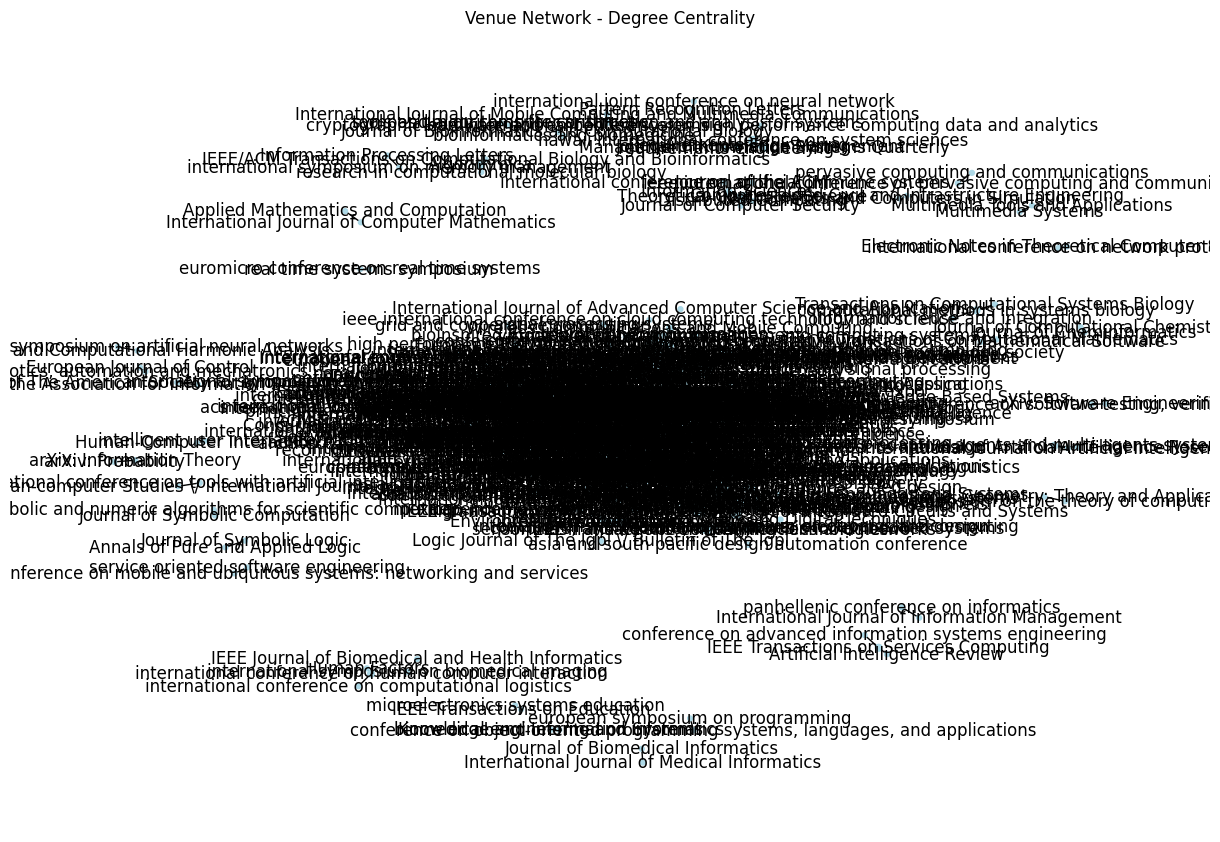

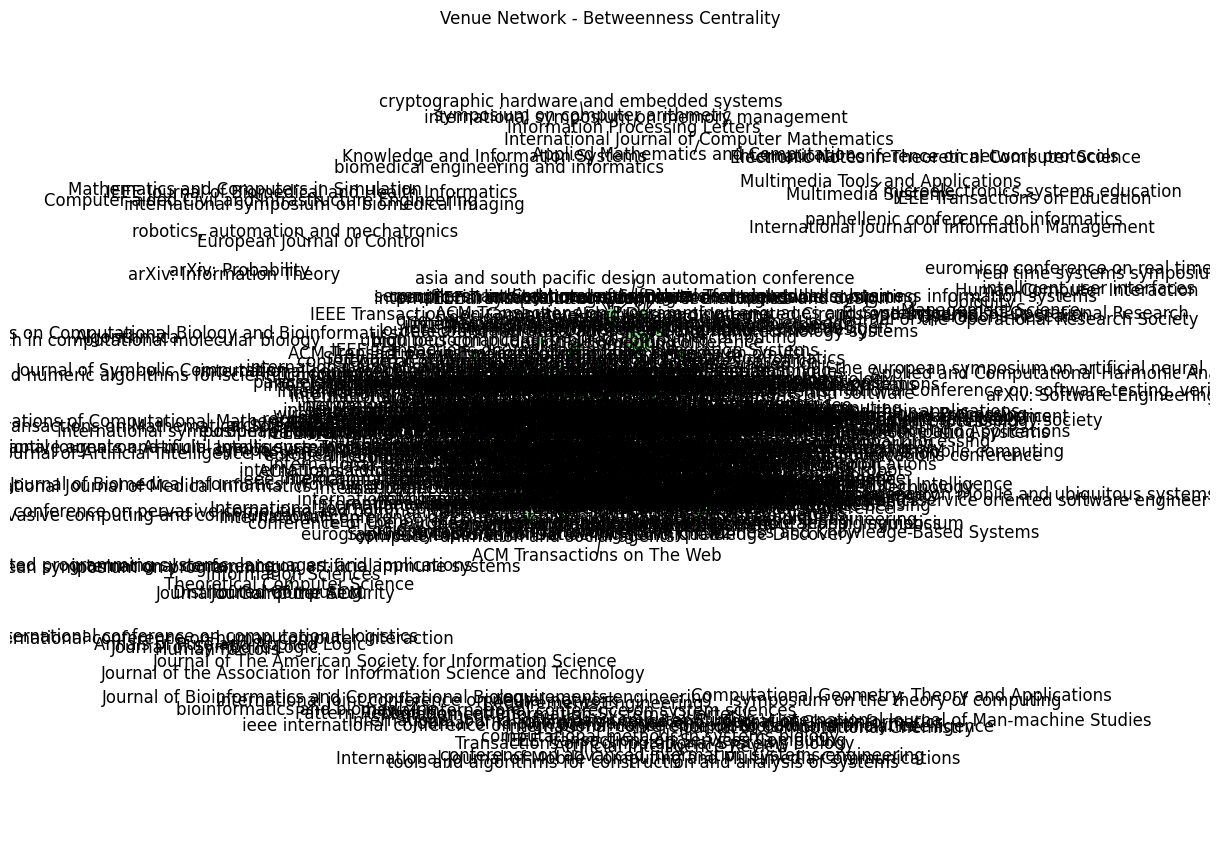

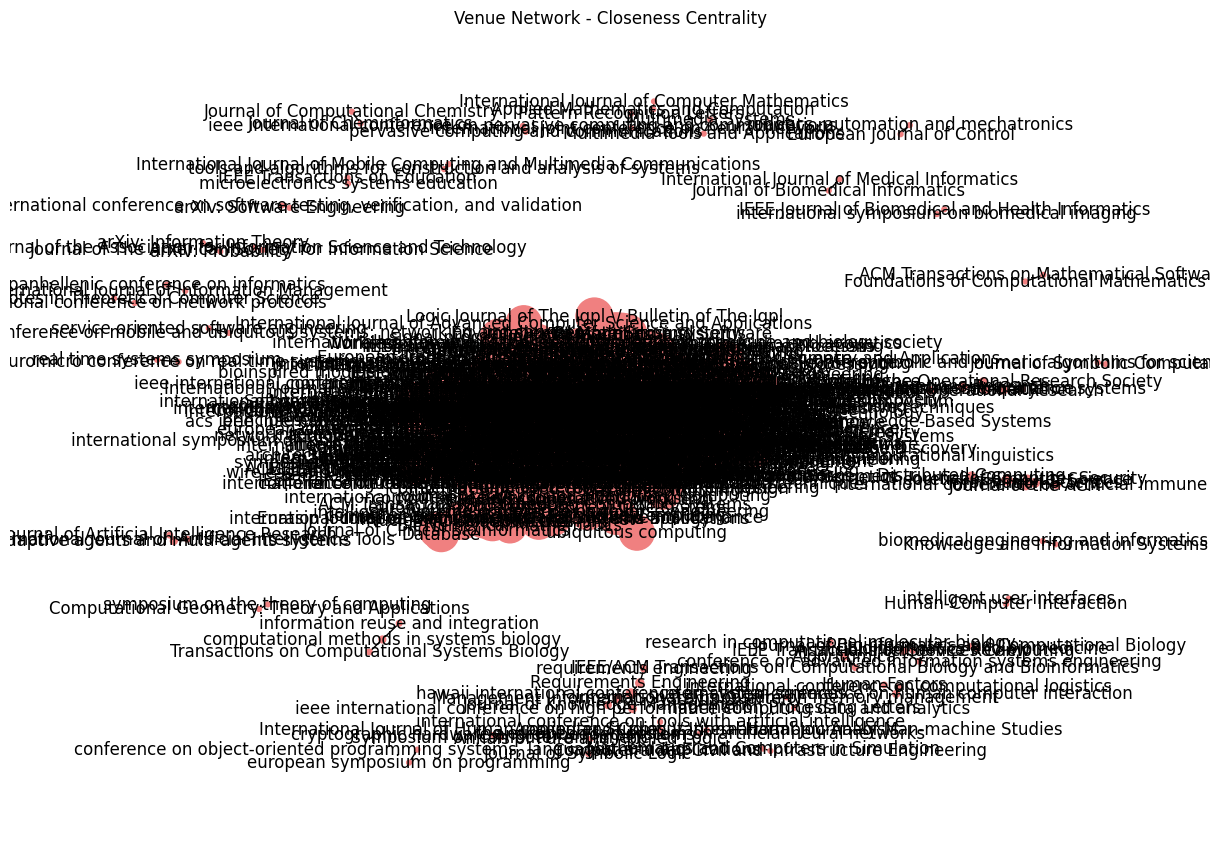

In [100]:
# Part 1.2.3.2
# Select the first 10,000 rows (or adjust as needed)
df1 = df.head(10000)

# Convert references column from string to list (if stored as a string)
df1['references'] = df1['references'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Create a venue network (Conference-Journal Network)
venue_network = {}

# Populate the venue network (nodes are venues, edges are citations between venues)
for _, row in df1.iterrows():
    paper_id = row['id']
    venue = row['venue']  # Assuming there is a 'venue' column for the conference/journal
    references = row['references']
    if(type(row['authors'])!=float and type(row['references'])!=float):
        for ref in references:
            ref_venue = df1[df1['id'] == ref]['venue'].values
            if ref_venue.size > 0 and ref_venue[0] != venue:  # If referenced paper has a different venue
                if venue not in venue_network:
                    venue_network[venue] = set()
                venue_network[venue].add(ref_venue[0])

# Create NetworkX Graph (undirected)
G = nx.Graph()

# Add nodes (venues) and edges (citations between different venues)
for venue, related_venues in venue_network.items():
    G.add_node(venue)
    for related_venue in related_venues:
        G.add_edge(venue, related_venue)

# Compute centrality measures
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)

# Rank venues by degree centrality (most connected venues)
top_degree = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
print("Top 10 Venues by Degree Centrality:")
for venue, centrality in top_degree:
    print(f"{venue}: {centrality:.4f}")

# Rank venues by betweenness centrality (most influential venues in connecting components)
top_betweenness = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
print("\nTop 10 Venues by Betweenness Centrality:")
for venue, centrality in top_betweenness:
    print(f"{venue}: {centrality:.4f}")

# Rank venues by closeness centrality (most central in spreading information)
top_closeness = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
print("\nTop 10 Venues by Closeness Centrality:")
for venue, centrality in top_closeness:
    print(f"{venue}: {centrality:.4f}")

# Visualize the centrality of the venues
# Degree centrality visualization
plt.figure(figsize=(12, 8))
node_sizes = [v * 5000 for v in degree_centrality.values()]  # Scale node sizes by degree centrality
nx.draw(G, with_labels=True, node_size=node_sizes, font_size=12, node_color='lightblue')
plt.title("Venue Network - Degree Centrality")
plt.show()

# Betweenness centrality visualization
plt.figure(figsize=(12, 8))
node_sizes = [v * 5000 for v in betweenness_centrality.values()]  # Scale node sizes by betweenness centrality
nx.draw(G, with_labels=True, node_size=node_sizes, font_size=12, node_color='lightgreen')
plt.title("Venue Network - Betweenness Centrality")
plt.show()

# Closeness centrality visualization
plt.figure(figsize=(12, 8))
node_sizes = [v * 5000 for v in closeness_centrality.values()]  # Scale node sizes by closeness centrality
nx.draw(G, with_labels=True, node_size=node_sizes, font_size=12, node_color='lightcoral')
plt.title("Venue Network - Closeness Centrality")
plt.show()


# Part 1.2.3.3
New connections between venues are shown in each year.

C:\Users\HP\AppData\Local\Temp\ipykernel_10656\898267779.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['references'] = df1['references'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)


Newly Formed Connections per Year:

Year: 1989
winter simulation conference newly connected to: ACM Computing Surveys
Bit Numerical Mathematics newly connected to: IEEE Computer

Year: 1990
IEEE Transactions on Information Theory newly connected to: IEEE Transactions on Communications

Year: 1991
systems man and cybernetics newly connected to: international conference on robotics and automation

Year: 1992

Year: 1993
IEEE Transactions on Information Theory newly connected to: IEEE Transactions on Communications
Interacting with Computers newly connected to: human factors in computing systems

Year: 1994
international conference on acoustics, speech, and signal processing newly connected to: IEEE Transactions on Acoustics, Speech, and Signal Processing

Year: 1995
IEEE Transactions on Image Processing newly connected to: IEEE Transactions on Signal Processing, IEEE Transactions on Communications
international conference on computer aided design newly connected to: ACM Transactions on P

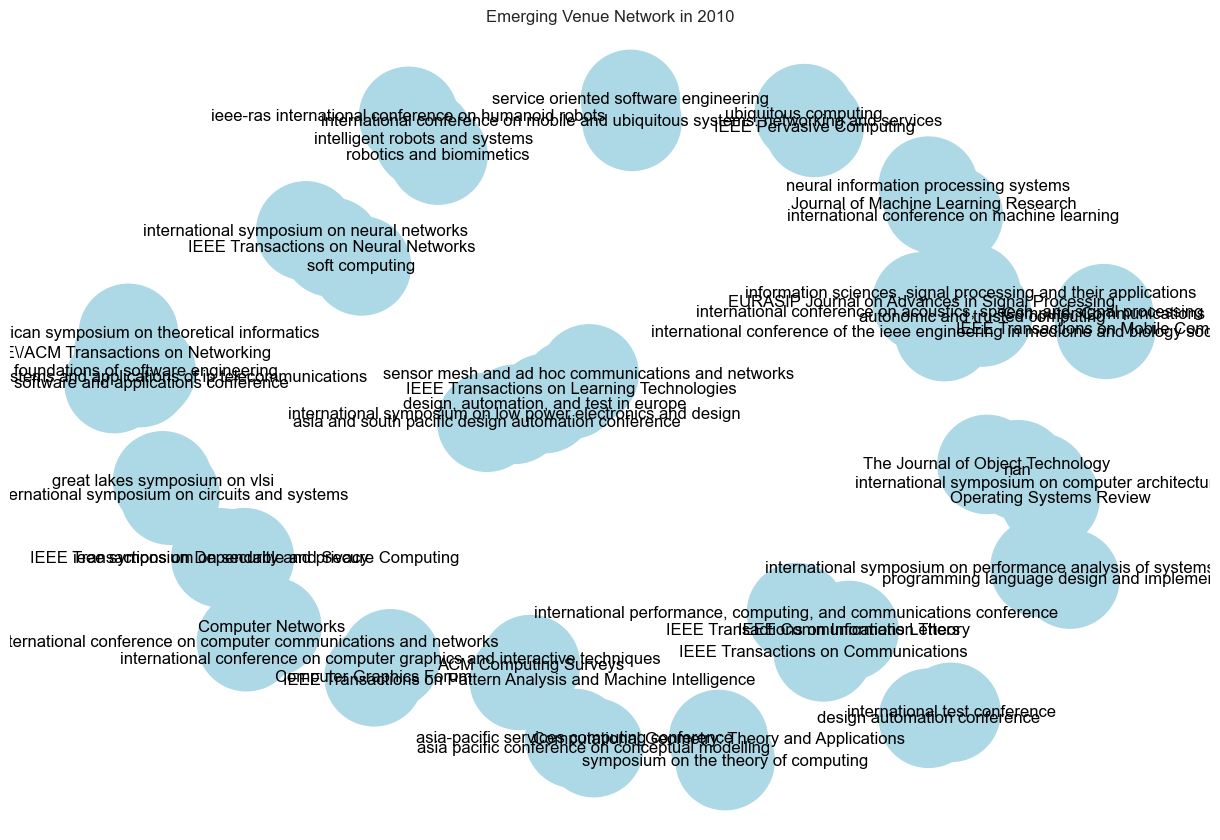

In [11]:
# Part 1.2.3.3
import math
import ast
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict

# Select the first 10,000 rows (or adjust as needed)
df1 = df.head(10000)

# Convert references column from string to list (if stored as a string)
df1['references'] = df1['references'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Create a dictionary to store venue connections over time
venue_connections_by_year = defaultdict(lambda: defaultdict(set))

# Populate the venue connections over time (based on year)
for _, row in df1.iterrows():
    paper_id = row['id']
    year = row['year']  # Assuming a 'year' column exists
    venue = row['venue']
    references = row['references']
    if(type(references)!=float):
        for ref in references:
            ref_venue = df1[df1['id'] == ref]['venue'].values
            if ref_venue.size > 0 and ref_venue[0] != venue:
            # Create an edge between venues in the same year
                venue_connections_by_year[year][venue].add(ref_venue[0])

# Analyze newly formed connections
new_connections = {}
for year in sorted(venue_connections_by_year.keys()):
    if year > min(venue_connections_by_year.keys()):
        prev_year = year - 1
        current_connections = venue_connections_by_year[year]
        prev_connections = venue_connections_by_year[prev_year]

        # Find new connections formed in the current year
        new_connections[year] = {
            venue: current_connections[venue] - prev_connections.get(venue, set())
            for venue in current_connections
        }

# Now, we can analyze the emerging fields by detecting new connections
print("Newly Formed Connections per Year:")
for year, connections in new_connections.items():
    print(f"\nYear: {year}")
    for venue, new_refs in connections.items():
        flag = True
        for ref in new_refs:
            if type(ref)==float:
                flag = False
        if type(venue)==float:
            flag = False

        if flag:
            print(f"{venue} newly connected to: {', '.join(new_refs)}")

# Visualize the emerging network of venues for a specific year (e.g., 2010)
G = nx.Graph()

# Build graph for the selected year (e.g., 2010)
selected_year = 2010
for venue, refs in new_connections[selected_year].items():
    for ref in refs:
        G.add_edge(venue, ref)

# Visualize the emerging venue network for the selected year
plt.figure(figsize=(12, 8))
node_sizes = [5000 for _ in G.nodes()]  # Same size for all nodes
nx.draw(G, with_labels=True, node_size=node_sizes, font_size=12, node_color='lightblue')
plt.title(f"Emerging Venue Network in {selected_year}")
plt.show()


# Part 1.2.4.1
Network density of the citation network is plotted over years. Just %10 of data is used due to computational limitations. The density is measured from the 1920 to 2017 by the step size of 10 years.

C:\Users\HP\AppData\Local\Temp\ipykernel_10656\3849287098.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['references'] = df1['references'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
C:\Users\HP\AppData\Local\Temp\ipykernel_10656\3849287098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['year_bin'] = pd.cut(df1['year'], bins=bins, right=False, labels=labels)


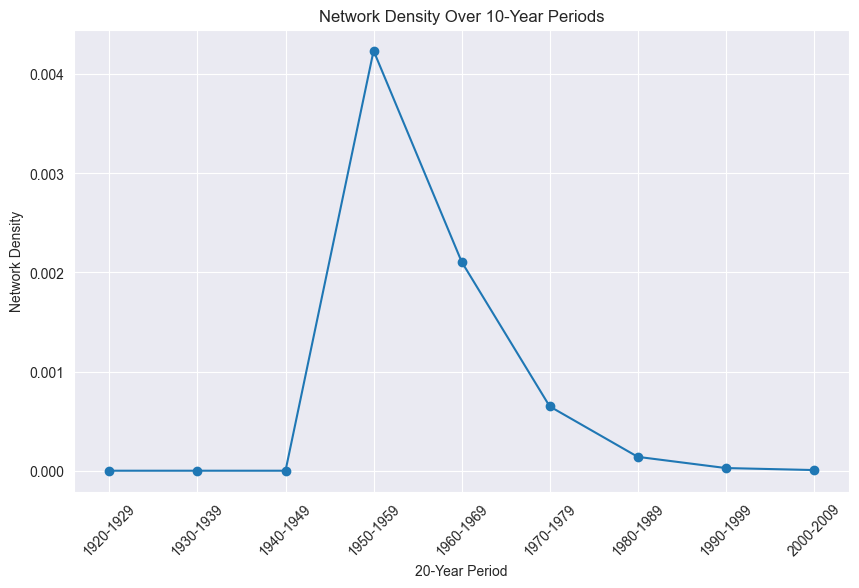

In [22]:
# Part 1.2.4.1
# Select the first 100,000 rows (or adjust as needed)
df1 = df.head(100000)

# Convert references column from string to list (if stored as a string)
df1['references'] = df1['references'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Create bins for years from 1920 to 2017 (in 20-year intervals)
bins = range(1920, 2020, 10)
labels = [f"{start}-{start+9}" for start in bins[:-1]]  # 1920-1939, 1940-1959, ..., 2000-2019

# Add a new column for the 20-year bin
df1['year_bin'] = pd.cut(df1['year'], bins=bins, right=False, labels=labels)

# Initialize a dictionary to store citation networks per 20-year period
citation_network_by_period = {label: nx.DiGraph() for label in labels}

# Populate the citation network for each year bin
for _, row in df1.iterrows():
    paper_id = row['id']
    year_bin = row['year_bin']
    references = row['references']
    if(type(year_bin)!=float):
        # Add nodes (papers) and edges (citations) for the corresponding 20-year bin
        citation_network_by_period[year_bin].add_node(paper_id)
        if(type(references)!=float):
            for ref in references:
                citation_network_by_period[year_bin].add_edge(paper_id, ref)

# Calculate network density for each 20-year period
network_density_by_period = {}

for period, G in citation_network_by_period.items():
    num_edges = G.number_of_edges()
    num_nodes = G.number_of_nodes()

    # Calculate the density for directed graph (citation network)
    density = num_edges / (num_nodes * (num_nodes - 1)) if num_nodes > 1 else 0
    network_density_by_period[period] = density

# Plot the network density over 20-year periods
plt.figure(figsize=(10, 6))
plt.plot(list(network_density_by_period.keys()), list(network_density_by_period.values()), marker='o')
plt.title("Network Density Over 10-Year Periods")
plt.xlabel("20-Year Period")
plt.ylabel("Network Density")
plt.xticks(rotation=45)  # Rotate period labels for better visibility
plt.grid(True)
plt.show()


# Part 1.2.4.2
Papers with most growth in citations per year are detected.


Top Burst Papers (Sudden Citation Growth):
                                    paper_id  prev_year  curr_year  \
34824   e2f7a74a-8430-4463-94ce-fe85dfd309f9       2015       2016   
292408  153c5014-dc7a-44a8-a93f-5cd27f1193df       2015       2016   
139793  c93eac1a-7d9a-48ab-9fb4-389c85bea00e       2015       2016   
3224    b944f77f-113b-4a02-ae5e-d4a124b8fd5b       2015       2016   
15285   c1b6b493-01ef-420f-be44-7bacfe34e846       2015       2016   
9838    f6bd8b64-684d-429a-aab5-8ff3a2c23cd6       2015       2016   
139749  051956bb-f64b-4fdb-87f8-3e2868b8b5d8       2015       2016   
106898  546cc930-3d5a-4208-a77b-a506f146ab97       2015       2016   
2009    7f1214b2-e070-4ff2-a5d3-647e7c16c2d7       2015       2016   
19972   dd83785a-dd19-41e3-9b25-ebabbd48d336       2015       2016   
666909  bff1945c-7b01-4b42-b6c4-1e3601c18a6b       2015       2016   
263269  493f502b-b1b8-412c-95fd-3c1103480f1d       2015       2016   
17060   65d5ccdc-7022-45b0-adf9-0385273b1283   

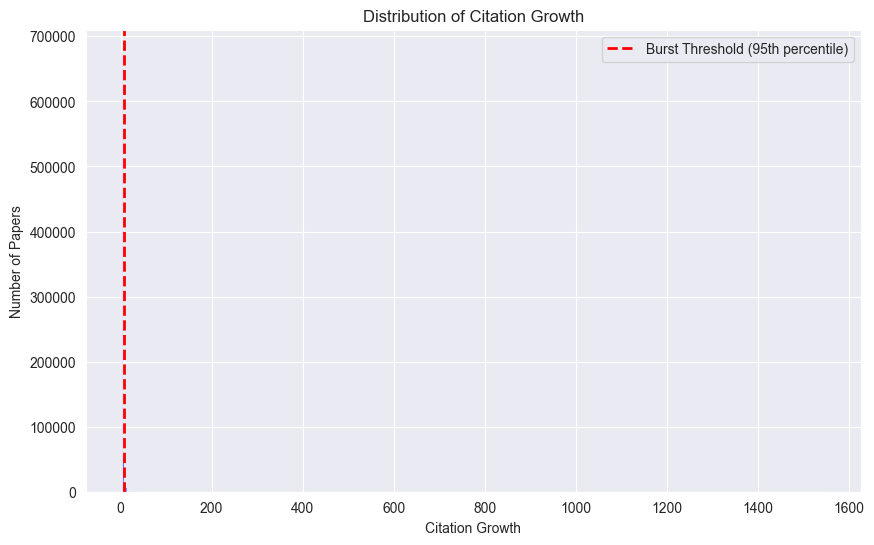

In [23]:
# Part 1.2.4.2
import numpy as np
# Select the first 1000000 rows (or adjust as needed)
df1 = df.head(1000000)
# Convert references column from string to list
df1['references'] = df1['references'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Create a citation count dictionary {paper_id: {year: citation_count}}
citation_counts = {}

# Build citation count per year
for _, row in df1.iterrows():
    paper_id = row['id']
    year = row['year']
    references = row['references']

    # Initialize paper entry if not already present
    if paper_id not in citation_counts:
        citation_counts[paper_id] = {}
    if(type(references)!=float):
        # Increment citation count for each referenced paper
        for ref in references:
            if ref not in citation_counts:
                citation_counts[ref] = {}
            citation_counts[ref][year] = citation_counts[ref].get(year, 0) + 1

# Convert to DataFrame for easier processing
citation_trends = []
for paper_id, yearly_counts in citation_counts.items():
    years = sorted(yearly_counts.keys())
    for i in range(1, len(years)):  # Compare each year with the previous one
        prev_year = years[i - 1]
        curr_year = years[i]
        growth = yearly_counts[curr_year] - yearly_counts[prev_year]  # Yearly growth
        if growth > 0:  # Only store increasing trends
            citation_trends.append((paper_id, prev_year, curr_year, yearly_counts[prev_year], yearly_counts[curr_year], growth))

# Convert trends to DataFrame
citation_trends_df = pd.DataFrame(citation_trends, columns=["paper_id", "prev_year", "curr_year", "prev_citations", "curr_citations", "growth"])

# Detect bursts: Large citation increases (e.g., top 5% of growth rates)
threshold = np.percentile(citation_trends_df["growth"], 95)  # Top 5% papers by growth
burst_papers = citation_trends_df[citation_trends_df["growth"] >= threshold]

# Display top burst papers
print("Top Burst Papers (Sudden Citation Growth):")
print(burst_papers.sort_values(by="growth", ascending=False).head(20))

# Plot burst papers
plt.figure(figsize=(10, 6))
plt.hist(citation_trends_df["growth"], bins=500, alpha=0.75, color='blue')
plt.axvline(threshold, color='red', linestyle='dashed', linewidth=2, label="Burst Threshold (95th percentile)")
plt.xlabel("Citation Growth")
plt.ylabel("Number of Papers")
plt.title("Distribution of Citation Growth")
plt.legend()
plt.show()


# Part 1.2.4.3
We examine new paper integrations to  the network by the clustering and centrality metrics.




C:\Users\HP\AppData\Local\Temp\ipykernel_17968\3082114776.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['references'] = df1['references'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)


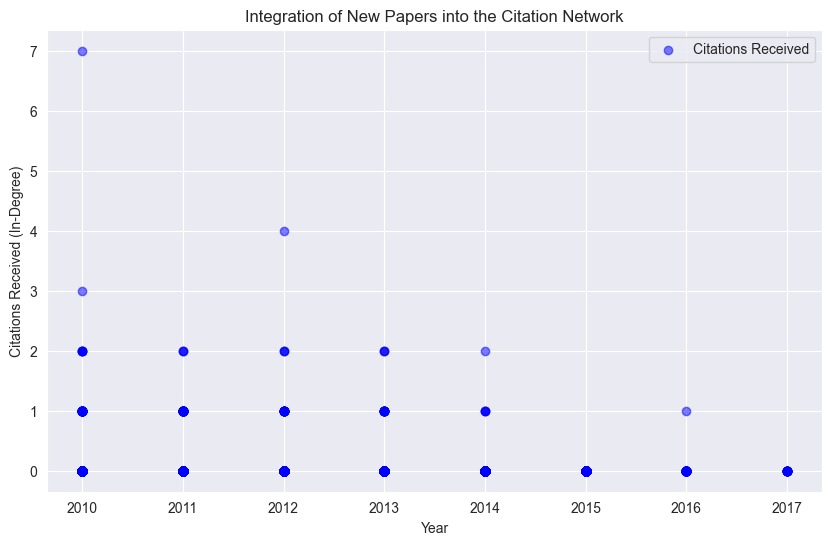

Top New Papers with High Citation Impact:
                                  paper_id  year  in_degree  out_degree  \
168   4c9f2bac-2f23-4170-a0f1-a3001f63a7b9  2010          7           1   
3648  4e4718ea-1600-4b01-b029-5dfe3be2031d  2012          4           1   
31    4afcc845-406a-434d-a463-10f1b74175c0  2010          3           0   
4597  4ba5fec7-0d8e-4fe3-98f7-a3b4a7bb2895  2013          2           0   
1646  4bf9f0c5-8034-4323-b335-e494787d534b  2011          2           0   
4282  4b36637f-64fa-41c4-b764-d6a677fc494b  2013          2           1   
473   509625c3-0fcd-44fe-aaa9-5726ae9bb09c  2010          2           1   
5117  4ab6c0ff-2d1a-4cb0-acdc-8ca7517cb14a  2014          2           1   
3262  4b9c17d1-9a08-48a2-95e0-47d3d4452a96  2012          2           1   
542   4b2584df-3478-4954-a348-8740e02e9033  2010          2           0   

      centrality  clustering  
168      0.00040    0.000000  
3648     0.00025    0.000000  
31       0.00015    0.333333  
4597    

In [33]:
import networkx as nx
# Part 1.2.4.3
df1 = df.head(20000)

# Convert references column from string to list
df1['references'] = df1['references'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Sort by year to ensure correct temporal order
df1 = df1.sort_values(by="year")

# Build citation network
G = nx.DiGraph()

# Track when each paper is added to the network
year_added = {}

for _, row in df1.iterrows():
    paper_id = row['id']
    year = row['year']
    references = row['references']

    G.add_node(paper_id, year=year)
    year_added[paper_id] = year
    if(type(references)!=float):
        for ref in references:
            if ref in year_added:  # Only add edges to already existing papers
                G.add_edge(paper_id, ref)

# Analyze how new papers integrate
new_papers = df1[df1["year"] >= 2010]  # Example: Consider papers from 2010 onwards

integration_data = []

for _, row in new_papers.iterrows():
    paper_id = row["id"]
    year = row["year"]

    if paper_id in G:
        in_degree = G.in_degree(paper_id)  # Citations received
        out_degree = G.out_degree(paper_id)  # Citations given

        # Compute betweenness centrality (position in network)
        centrality = nx.degree_centrality(G).get(paper_id, 0)

        # Compute clustering coefficient (local integration)
        clustering = nx.clustering(G.to_undirected(), paper_id) if G.degree(paper_id) > 0 else 0

        integration_data.append((paper_id, year, in_degree, out_degree, centrality, clustering))

# Convert to DataFrame
integration_df = pd.DataFrame(integration_data, columns=["paper_id", "year", "in_degree", "out_degree", "centrality", "clustering"])

# Plot citation distribution over time
plt.figure(figsize=(10, 6))
plt.scatter(integration_df["year"], integration_df["in_degree"], alpha=0.5, color='blue', label="Citations Received")
plt.xlabel("Year")
plt.ylabel("Citations Received (In-Degree)")
plt.title("Integration of New Papers into the Citation Network")
plt.legend()
plt.grid(True)
plt.show()

# Display top influential new papers
print("Top New Papers with High Citation Impact:")
print(integration_df.sort_values(by="in_degree", ascending=False).head(10))


# Part 2.1.1
Forming the author-author network.

In [34]:
# Part 2.1.1
import ast
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict
df1 = df[-10000:-1]
# Convert authors column from string to list (if needed)
df1['authors'] = df1['authors'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Initialize an empty graph
G = nx.Graph()

# Dictionary to store author's published papers
author_papers = {}

# Build the author collaboration network
for _, row in df1.iterrows():
    paper_id = row['id']
    authors = row['authors']

    # Ensure all authors are nodes
    for author in authors:
        if author not in G:
            G.add_node(author)
            author_papers[author] = []  # Initialize list of papers

        # Store the paper in the author's list
        author_papers[author].append(paper_id)

    # Create edges between co-authors
    for i in range(len(authors)):
        for j in range(i + 1, len(authors)):
            G.add_edge(authors[i], authors[j])

# Output basic statistics
print(f"Number of authors (nodes): {G.number_of_nodes()}")
print(f"Number of co-authorships (edges): {G.number_of_edges()}")


C:\Users\HP\AppData\Local\Temp\ipykernel_17968\2688195588.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['authors'] = df1['authors'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)


Number of authors (nodes): 30901
Number of co-authorships (edges): 63220


# Part 2.1.2
We have used Louvain and Walktrap algorithms for the community detection.

In [35]:
# Part 2.1.2
import networkx as nx
import community as community_louvain  # Louvain
import igraph as ig  # Walktrap
from scipy.cluster.hierarchy import linkage, fcluster
G = G.to_undirected()

# Convert NetworkX graph to iGraph for Walktrap
def nx_to_igraph(G):
    mapping = {node: i for i, node in enumerate(G.nodes())}
    edges = [(mapping[u], mapping[v]) for u, v in G.edges()]
    ig_graph = ig.Graph(len(G.nodes()), edges)
    return ig_graph, mapping

louvain_partition = community_louvain.best_partition(G)
num_louvain_communities = len(set(louvain_partition.values()))
print(f"Louvain detected {num_louvain_communities} communities.")

ig_graph, mapping = nx_to_igraph(G)
walktrap_communities = ig_graph.community_walktrap().as_clustering()
walktrap_partition = {node: walktrap_communities.membership[mapping[node]] for node in G.nodes()}
num_walktrap_clusters = len(set(walktrap_communities.membership))  # Number of clusters
print(f"Walktrap detected {num_walktrap_clusters} communities.")

### 3️⃣ Hierarchical Clustering (Agglomerative)
# Convert adjacency matrix to a distance matrix
#adj_matrix = nx.to_numpy_array(G)
#distance_matrix = 1 - adj_matrix  # Convert similarity to distance

# Perform hierarchical clustering
# Z = linkage(distance_matrix, method='ward')
# num_clusters = 10  # Adjust as needed
# hierarchical_partition = fcluster(Z, num_clusters, criterion='maxclust')
#
# # Map nodes to their hierarchical clusters
# hierarchical_partition_dict = {node: hierarchical_partition[i] for i, node in enumerate(G.nodes())}
# print("\nHierarchical Clustering Results:")
# print(hierarchical_partition_dict)


Louvain detected 6391 communities.
Walktrap detected 6627 communities.


# Part 2.1.3
The algorithms areevaluated by the clustering coefficient.

In [36]:
# Part 2.1.3
import networkx as nx
import community as community_louvain  # Louvain
import igraph as ig  # Walktrap
import numpy as np

# Ensure G is undirected (co-authorship is mutual)

# Convert NetworkX graph to iGraph for Walktrap
def nx_to_igraph(G):
    mapping = {node: i for i, node in enumerate(G.nodes())}
    edges = [(mapping[u], mapping[v]) for u, v in G.edges()]
    ig_graph = ig.Graph(len(G.nodes()), edges)
    return ig_graph, mapping

# Function to compute average clustering coefficient for a partition
def avg_clustering_coefficient(G, partition):
    cluster_coeffs = []
    i = 0
    for community in set(partition.values()):
        subgraph_nodes = [node for node in G.nodes() if partition[node] == community]
        if len(subgraph_nodes) > 1:
            subgraph = G.subgraph(subgraph_nodes)
            coeff = nx.average_clustering(subgraph)
            cluster_coeffs.append(coeff)
    return np.mean(cluster_coeffs) if cluster_coeffs else 0

louvain_score = avg_clustering_coefficient(G, louvain_partition)
print(f"Louvain Clustering Coefficient: {louvain_score}")

walktrap_score = avg_clustering_coefficient(G, walktrap_partition)
num_walktrap_clusters = len(set(walktrap_communities.membership))  # Number of clusters
print(f"Walktrap Clustering Coefficient: {walktrap_score}")


# Find the best clustering method
best_method = max(
    [("Louvain", louvain_score), ("Walktrap", walktrap_score)],
    key=lambda x: x[1]
)

print(f"\nBest Clustering Algorithm Based on Clustering Coefficient: {best_method[0]} with score {best_method[1]:.4f}")


Louvain Clustering Coefficient: 0.7186624806899414
Walktrap Clustering Coefficient: 0.7230602914926957

Best Clustering Algorithm Based on Clustering Coefficient: Walktrap with score 0.7231


# Part 2.2.1
Keywords of titles and abstracts are extracted with KeyBERT model.


In [38]:
import pandas as pd
from keybert import KeyBERT
from sentence_transformers import SentenceTransformer
import torch

# Check if CUDA (GPU) is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Drop rows where 'title' or 'abstract' columns are NaN
df1 = df1.dropna(subset=['title', 'abstract'])

# Load the SentenceTransformer model (you can choose a different model if needed)
model = SentenceTransformer('distilbert-base-nli-mean-tokens')

# Move the model to GPU if available
model = model.to(device)

# Initialize the KeyBERT model with the SentenceTransformer model
kw_model = KeyBERT(model=model)

# Function to extract keywords from title and abstract
def extract_keywords_from_title_abstract(row):
    title = row['title']
    abstract = row['abstract']

    # Extract keywords from the title and abstract separately
    title_keywords = kw_model.extract_keywords(title, keyphrase_ngram_range=(1, 2), stop_words='english', top_n=5)
    abstract_keywords = kw_model.extract_keywords(abstract, keyphrase_ngram_range=(1, 2), stop_words='english', top_n=5)

    # Combine both sets of keywords (flatten the list of tuples to just the words)
    combined_keywords = set([kw[0] for kw in title_keywords + abstract_keywords])

    return list(combined_keywords)

# Apply the function to extract keywords for each paper
df1['keywords'] = df1.apply(extract_keywords_from_title_abstract, axis=1)

# Check the results for the first few papers
print(df1[['title', 'abstract', 'keywords']].head())

# Optionally, save the results back to a CSV
# df.to_csv("papers_with_keywords.csv", index=False)


                                                    title  \
990000  Role of Virtual Biology Laboratories in Online...   
990001  Guiding the Selection of Security Patterns for...   
990004  Code Smells Incidence: Does It Depend on the A...   
990005  Sum-product-max networks for tractable decisio...   
990006  Packing Short Plane Spanning Graphs in Complet...   

                                                 abstract  \
990000  Virtual laboratories encourage Internet based ...   
990001  Securing critical systems such as Cyber-Physic...   
990004  Background: Code smells are considered detrime...   
990005  Investigations into probabilistic graphical mo...   
990006  Given a set of points in the plane, we want to...   

                                                 keywords  
990000  [laboratories encourage, virtual biology, remo...  
990001  [guiding selection, security patterns, mechani...  
990004  [smells, smells incidence, smells test, code s...  
990005  [tractable decisio

C:\Users\HP\AppData\Local\Temp\ipykernel_17968\1471089162.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['keywords'] = df1.apply(extract_keywords_from_title_abstract, axis=1)


# Part 2.2.2
Finding each paper community by its authors communities.

In [39]:
# Assuming `walktrap_partition` gives the community assignment for each author
# Map each paper to the community of its authors
paper_community_mapping = {}

for _, row in df1.iterrows():
    paper_id = row['id']
    authors = row['authors']
    # Assuming authors are stored as a comma-separated string
    # Aggregate the communities of authors in this paper
    paper_communities = set()
    for author in authors:
        author = author.replace('[','')
        author = author.replace(']','')
        author_id = author.strip()  # Clean author name if necessary

        if author_id in walktrap_partition:
            paper_communities.add(walktrap_partition[author_id])  # Add the author's community to the paper's communities

    paper_community_mapping[paper_id] = list(paper_communities)

# Print the community assignments for some papers
for paper_id, communities in list(paper_community_mapping.items())[:500]:
    print(f"Paper ID: {paper_id}, Communities: {communities}")


Paper ID: 0093fd6c-55ed-44de-a506-3c2511ca91ef, Communities: [0]
Paper ID: 00f80f03-aa99-48b2-80a7-88e89d94840c, Communities: [1]
Paper ID: 01605ce5-06e1-4f19-a05f-fcbe908a6fd1, Communities: [4]
Paper ID: 01ab1987-e7b9-445e-8dd3-944980e56144, Communities: [5]
Paper ID: 01d36cd7-d0b7-4fed-95f7-97f1ca758623, Communities: [6]
Paper ID: 02fab393-854b-4159-8d90-93eb2c495310, Communities: [9]
Paper ID: 044777fa-83a3-41b9-bb8f-04397f0b711f, Communities: [15]
Paper ID: 04b03c8c-af47-46a6-bcf7-48d057eeb97a, Communities: [17]
Paper ID: 04d691e9-3034-4e6e-a32b-3f7b12777e62, Communities: [18]
Paper ID: 05172a80-9e4b-44ff-bb94-fab025e798e1, Communities: [21]
Paper ID: 058c6869-a273-4961-8ade-fa6c29910024, Communities: [24]
Paper ID: 0597d77b-c2dc-4a83-85be-67b24a4909b4, Communities: [25]
Paper ID: 05e26e02-629b-41bc-885a-6ba3b4bd6b1f, Communities: [26]
Paper ID: 06923781-59e4-4673-9cc5-c6dc2b9d62f3, Communities: [28]
Paper ID: 06dc190b-d807-48f3-afa7-a5f156666a7d, Communities: [32]
Paper ID: 073755

# Part 2.2.3
The extracted keywords for each commuinity basde on the keywords of corresponding papers is mentioned below.

In [40]:
from collections import Counter

# Initialize a dictionary to store aggregated keywords for each community
community_keywords = {}

# For each paper, map the paper to its communities and aggregate the keywords
for paper_id, communities in paper_community_mapping.items():
    keywords = df1.loc[df1['id'] == paper_id, 'keywords'].values[0]  # Get keywords for the paper

    # For each community the paper belongs to, add its keywords
    for community in communities:
        if community not in community_keywords:
            community_keywords[community] = Counter()  # Initialize counter for this community

        # Add the paper's keywords to the community's keyword counter
        community_keywords[community].update(keywords)

# Now, for each community, you can get the top N keywords (most frequent ones)
top_keywords_per_community = {}
top_n = 10  # Number of top keywords to report per community

for community, keyword_counter in community_keywords.items():
    # Get the top N keywords sorted by frequency
    top_keywords = [kw[0] for kw in keyword_counter.most_common(top_n)]
    top_keywords_per_community[community] = top_keywords

# Print the top keywords for each community
for community, top_keywords in top_keywords_per_community.items():
    print(f"Community {community}: {', '.join(top_keywords)}")


Community 0: laboratories encourage, virtual biology, remote learning, online remote, biology laboratories, experiments biology, encourage internet, virtual laboratories, laboratories online, video tutorials
Community 1: guiding selection, security patterns, mechanisms critical, important issue, time systems, securing critical, selection security, security, security solution, systems important
Community 4: smells, smells incidence, smells test, code smells, code smell, smell incidence, application domain, depend application
Community 5: probabilistic graphical, tractable decision, sum product, influence diagrams, representation computation, method learning, product max, decision making, max networks, graphical models
Community 6: graphs, plane want, spanning graph, graphs complete, graph consider, extract graphs, complete geometric, spanning graphs, geometric graphs
Community 9: selection, selection np, decades algorithmic, np complete, discussed decades, integer column, complete, deca

# Part 2.2.4
Name of each community is chosen by finding the most common keyword in papers written by community authors.

In [42]:
# Map each paper to the community of its authors
paper_community_mapping = {}

for _, row in df1.iterrows():
    paper_id = row['id']
    authors = row['authors']
    # Assuming authors are stored as a comma-separated string
    # Aggregate the communities of authors in this paper
    paper_communities = set()
    for author in authors:
        author = author.replace('[','').replace(']','').strip()  # Clean author name if necessary

        if author in walktrap_partition:
            paper_communities.add(walktrap_partition[author])  # Add the author's community to the paper's communities

    paper_community_mapping[paper_id] = list(paper_communities)

# Now, aggregate keywords for each community based on the papers written by the authors in that community
community_keywords = {}

# For each paper, map the paper to its communities and aggregate the keywords
for paper_id, communities in paper_community_mapping.items():
    keywords = df1.loc[df1['id'] == paper_id, 'keywords'].values[0]  # Get keywords for the paper

    # For each community the paper belongs to, add its keywords
    for community in communities:
        if community not in community_keywords:
            community_keywords[community] = Counter()  # Initialize counter for this community

        # Add the paper's keywords to the community's keyword counter
        community_keywords[community].update(keywords)

# Now, for each community, find the most common keyword (not top N, just the most common one)
most_common_keyword_per_community = {}

for community, keyword_counter in community_keywords.items():
    # Get the most common keyword in the community
    most_common_keyword, count = keyword_counter.most_common(1)[0]
    most_common_keyword_per_community[community] = (most_common_keyword, count)

# Print the most common keyword for each community
for community, (most_common_keyword, count) in most_common_keyword_per_community.items():
    print(f"Community {community}: Chosen name: {most_common_keyword}")

Community 0: Chosen name: laboratories encourage
Community 1: Chosen name: guiding selection
Community 4: Chosen name: smells
Community 5: Chosen name: probabilistic graphical
Community 6: Chosen name: graphs
Community 9: Chosen name: selection
Community 15: Chosen name: online
Community 17: Chosen name: proposed algorithm
Community 18: Chosen name: code smells
Community 21: Chosen name: petri nets
Community 24: Chosen name: ascending combinatorial
Community 25: Chosen name: online simulation
Community 26: Chosen name: simulation analytics
Community 28: Chosen name: hybrid energy
Community 32: Chosen name: learning hypothetico
Community 34: Chosen name: planning brazil
Community 35: Chosen name: hundreds videos
Community 37: Chosen name: design cost
Community 38: Chosen name: transistor mmpg
Community 43: Chosen name: wireless node
Community 45: Chosen name: analysis neuronal
Community 48: Chosen name: larger wireless
Community 49: Chosen name: agile projects
Community 53: Chosen name:

# Part 2.3
The embedding vectors are calculated by the SentenceTransformer embedding and we have used k-means for clustering. The clusters are visualized by choosing the 2 first principal components.

1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000


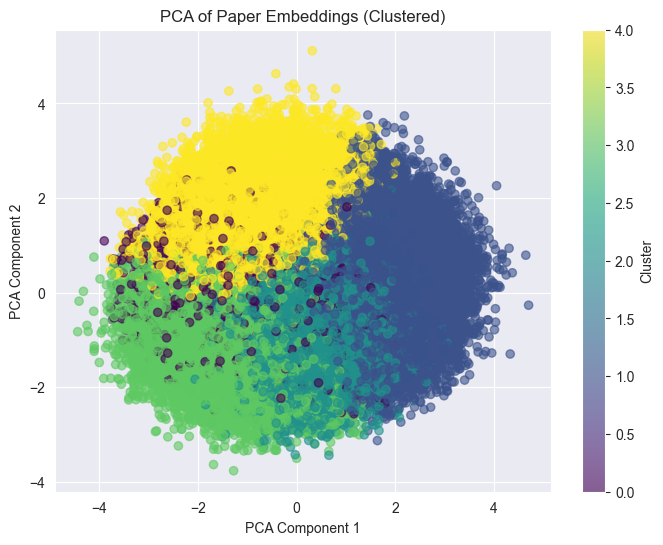

                                                    title  cluster
900001  Real-time quality evaluation of adaptation str...        1
900003  Proactive Dynamic Distributed Constraint Optim...        2
900004  Application of PPT Playing System in the Gener...        4
900005  3D real-time indoor localization via broadband...        1
900006  DASHTrails: An Approach for Modeling and Analy...        2


In [2]:
import pandas as pd
import torch
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Check if CUDA (GPU) is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load dataset (replace 'your_dataset.csv' with your actual file)

df1 = df[-100000:-1]
# Drop rows where 'title' or 'abstract' columns are NaN
df1 = df1.dropna(subset=['title', 'abstract'])

# Initialize the SentenceBERT model (you can choose a different model if needed)
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')  # Example model

# Move the model to GPU if available
model = model.to(device)
# Function to embed title and abstract
def embed_paper_title_abstract(row):
    title = row['title']
    abstract = row['abstract']
    # Get embeddings for title and abstract separately
    title_embedding = model.encode(title, device=device)
    abstract_embedding = model.encode(abstract, device=device)

    # Combine both embeddings (here we average them, you could also concatenate them)
    combined_embedding = np.concatenate([title_embedding, abstract_embedding], axis=0)

    return combined_embedding

embeddings = []
i = 0
# Apply the function to embed all papers
for _, row in df1.iterrows():
    i+=1
    if(i%1000==0):
        print(i)
    embeddings.append(embed_paper_title_abstract(row))
embeddings = np.array(embeddings)

# 2. Perform clustering (KMeans as an example, adjust n_clusters as needed)
n_clusters = 5  # Example: you can adjust the number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df1['cluster'] = kmeans.fit_predict(embeddings)

# 3. Optionally, reduce dimensions for visualization (PCA or t-SNE)
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)

# 4. Visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], c=df1['cluster'], cmap='viridis', alpha=0.6)
plt.title('PCA of Paper Embeddings (Clustered)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()


# Print the first few papers with their cluster labels
print(df1[['title', 'cluster']].head())


# Part 2.3
The clusters are evaluated by the Davis-Buldian Index and Silhouette scores.

In [17]:
import pandas as pd
import torch
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


# 2. Evaluate the clustering using Silhouette Score and Davies-Bouldin Index
silhouette_avg = silhouette_score(embeddings, df1['cluster'])
dbi_score = davies_bouldin_score(embeddings, df1['cluster'])

# Print the evaluation metrics
print(f"Silhouette Score: {silhouette_avg:.4f}")
print(f"Davies-Bouldin Index: {dbi_score:.4f}")

Silhouette Score: 0.0362
Davies-Bouldin Index: 4.0565


# Part 2.3.5
Unique venues.

In [18]:
# Assuming the 'venue' column contains the venue information (e.g., conference/journal)
unique_venues = df1['venue'].dropna().unique()  # Drop NaNs and get unique values

# Print the unique venues
print(f"Unique venues in the dataset: \n{unique_venues}")


Unique venues in the dataset: 
['international conference on engineering of complex computer systems'
 'quality of information and communications technology'
 'international joint conference on artificial intelligence'
 'international symposium on algorithms and computation'
 'arXiv: Combinatorics' 'bioinformatics and biomedicine'
 'international conference on control and automation'
 'international conference on software maintenance'
 'Information Systems Research' 'winter simulation conference'
 'international symposium on multimedia'
 'asia pacific conference on circuits and systems'
 'Journal of Communications and Networks'
 'Frontiers in Computational Neuroscience'
 'BMC Medical Informatics and Decision Making'
 'Circuits Systems and Signal Processing'
 'IEEE Transactions on Very Large Scale Integration Systems'
 'international conference on principles of distributed systems'
 'Computers & Operations Research' 'arXiv: Artificial Intelligence'
 'arXiv: Cryptography and Security' 'l

# Part 2.3.6
The venues are used as the ground truth labels for clusters.The Jaccard similarity index is measured for the detected communities and the venues labesl.

In [21]:
import pandas as pd
import numpy as np
from sklearn.metrics import jaccard_score
from collections import defaultdict

# Assuming df contains the 'venue' column and 'kmeans_cluster' column where papers have been clustered using K-means
# Also assuming 'kmeans_labels' contain the cluster assignments from the K-means method for each paper

# Step 1: Extract venue labels (true labels)
venue_labels = df1['venue']  # Use the venue column as the ground truth clustering

# Step 2: Extract K-means cluster assignments (predicted labels)
kmeans_labels = df1['cluster']  # Assuming this column contains the K-means clustering results for papers
# Step 3: Ensure that both the venue_labels and kmeans_labels are aligned (same papers)
# (Ensure paper IDs are the same between the two)
assert len(venue_labels) == len(kmeans_labels)

# Step 4: Create sets for each cluster from K-means and venue clustering

# Create a dictionary of papers assigned to each K-means cluster
kmeans_clusters = defaultdict(set)
for paper_id, cluster_id in zip(df['id'], kmeans_labels):
    kmeans_clusters[cluster_id].add(paper_id)

# Create a dictionary of papers assigned to each venue cluster (ground truth)
venue_clusters = defaultdict(set)
for paper_id, venue in zip(df['id'], venue_labels):
    venue_clusters[venue].add(paper_id)

# Step 5: Compute Jaccard Similarity Index for each pair of clusters
jaccard_similarities = []

for kmeans_cluster_id, kmeans_cluster_papers in kmeans_clusters.items():
    for venue_cluster_name, venue_cluster_papers in venue_clusters.items():
        # Compute Jaccard Similarity between the papers in the current K-means cluster and the venue cluster
        intersection = len(kmeans_cluster_papers.intersection(venue_cluster_papers))
        union = len(kmeans_cluster_papers.union(venue_cluster_papers))
        jaccard_index = intersection / union if union != 0 else 0
        jaccard_similarities.append((kmeans_cluster_id, venue_cluster_name, jaccard_index))

# Step 6: Sort by the highest Jaccard Similarity Index
jaccard_similarities = sorted(jaccard_similarities, key=lambda x: x[2], reverse=True)

# Print out the top results
print(f"Top Jaccard Similarity Results (K-means vs. Venue):\n")
for kmeans_cluster_id, venue_cluster_name, jaccard_index in jaccard_similarities:
    print(f"K-means Cluster {kmeans_cluster_id} vs. Venue {venue_cluster_name}: Jaccard Similarity = {jaccard_index:.4f}")


Top Jaccard Similarity Results (K-means vs. Venue):

K-means Cluster 3 vs. Venue nan: Jaccard Similarity = 0.1308
K-means Cluster 1 vs. Venue nan: Jaccard Similarity = 0.1145
K-means Cluster 2 vs. Venue nan: Jaccard Similarity = 0.1082
K-means Cluster 4 vs. Venue nan: Jaccard Similarity = 0.0979
K-means Cluster 0 vs. Venue nan: Jaccard Similarity = 0.0888
K-means Cluster 0 vs. Venue high performance computing and communications: Jaccard Similarity = 0.0836
K-means Cluster 2 vs. Venue international conference on conceptual structures: Jaccard Similarity = 0.0806
K-means Cluster 2 vs. Venue arXiv: Information Theory: Jaccard Similarity = 0.0683
K-means Cluster 2 vs. Venue asia pacific conference on circuits and systems: Jaccard Similarity = 0.0670
K-means Cluster 1 vs. Venue arXiv: Computer Vision and Pattern Recognition: Jaccard Similarity = 0.0612
K-means Cluster 0 vs. Venue ieee international conference on cloud computing technology and science: Jaccard Similarity = 0.0546
K-means Clu

# Part 3
Splitting the data to the train-test tensors.

In [46]:
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import TensorDataset, DataLoader
year = np.reshape(np.array(df1['year'],dtype=float),(np.shape(df1)[0],1))
year-=np.mean(year)
year = np.repeat(year,100,axis=1)
x_data = np.concatenate([embeddings,year],axis=1)
y_data = np.array(df1['n_citation'],dtype=float)
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.15, random_state=42,shuffle=True)
# Convert NumPy arrays to PyTorch tensors
x_train_tensor = torch.tensor(x_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
x_test_tensor = torch.tensor(x_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

# Create TensorDatasets
train_dataset = TensorDataset(x_train_tensor, y_train_tensor)
test_dataset = TensorDataset(x_test_tensor, y_test_tensor)

# Create DataLoaders with batch size 128
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)

NameError: name 'embeddings' is not defined

Two layer fully connected neural network with Leaky ReLU activation and 8 neurons in the hidden layer is used as the Regressor after grid search on the number of hidden layers and the number of hidden neurons.

In [58]:
import torch.nn as nn

class my_regressor(nn.Module):
    def __init__(self, input_dim=868):
        super(my_regressor, self).__init__()

        self.network = nn.Sequential(
            nn.Linear(input_dim, 8),
            nn.LeakyReLU(0.1),
            nn.Linear(8, 1) # Linear activation for output
        )
    def forward(self, x):
        return self.network(x)


# Define the model (assuming your model is called `FCNN`)
model = my_regressor() # Make sure your model is already defined
model.to(device) # Move model to GPU if available

my_regressor(
  (network): Sequential(
    (0): Linear(in_features=868, out_features=8, bias=True)
    (1): LeakyReLU(negative_slope=0.1)
    (2): Linear(in_features=8, out_features=1, bias=True)
  )
)

Trainning loop.

In [60]:
import torch.optim as optim
import torch.nn as nn

# Define optimizer and loss function
optimizer = optim.Adam(model.parameters(), lr=0.001) # Adam optimizer
criterion = nn.MSELoss() # Mean Squared Error (MSE) loss function
# Training loop
num_epochs = 50 # Define the number of epochs

for epoch in range(num_epochs):
    model.train() # Set model to training mode
    train_loss = 0.0
    for batch_x, batch_y in train_loader:
        batch_x, batch_y = batch_x.to(device), batch_y.to(device) # Move data to GPU if available

        optimizer.zero_grad() # Reset gradients
        outputs = model(batch_x) # Forward pass
        loss = criterion(outputs, batch_y.view(-1, 1)) # Compute loss
        loss.backward() # Backpropagation
        optimizer.step() # Update weights

        train_loss += loss.item() * batch_x.size(0) # Accumulate loss

    train_loss /= len(train_loader.dataset) # Average training loss

    # Validation phase
    model.eval() # Set model to evaluation mode
    val_loss = 0.0
    with torch.no_grad(): # Disable gradient computation
        for batch_x, batch_y in test_loader:
            batch_x, batch_y = batch_x.to(device), batch_y.to(device)
            outputs = model(batch_x)
            loss = criterion(outputs, batch_y.view(-1, 1))
            val_loss += loss.item() * batch_x.size(0)

    val_loss /= len(test_loader.dataset) # Average validation loss

    print(f"Epoch {epoch+1}/{num_epochs} - Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")

Epoch 1/50 - Train Loss: 1765.1279, Val Loss: 962.0597
Epoch 2/50 - Train Loss: 1759.6417, Val Loss: 959.1124
Epoch 3/50 - Train Loss: 1755.3077, Val Loss: 956.3244
Epoch 4/50 - Train Loss: 1751.1842, Val Loss: 954.2766
Epoch 5/50 - Train Loss: 1747.9348, Val Loss: 953.0430
Epoch 6/50 - Train Loss: 1747.7030, Val Loss: 955.7915
Epoch 7/50 - Train Loss: 1745.0692, Val Loss: 952.4884
Epoch 8/50 - Train Loss: 1743.7779, Val Loss: 950.7112
Epoch 9/50 - Train Loss: 1740.4868, Val Loss: 950.4509
Epoch 10/50 - Train Loss: 1738.7532, Val Loss: 955.5580
Epoch 11/50 - Train Loss: 1738.5204, Val Loss: 951.2181
Epoch 12/50 - Train Loss: 1736.0812, Val Loss: 949.7391
Epoch 13/50 - Train Loss: 1732.0904, Val Loss: 950.5383
Epoch 14/50 - Train Loss: 1731.1135, Val Loss: 953.6405
Epoch 15/50 - Train Loss: 1728.6904, Val Loss: 950.2300
Epoch 16/50 - Train Loss: 1726.2347, Val Loss: 955.5105
Epoch 17/50 - Train Loss: 1724.8663, Val Loss: 950.6064
Epoch 18/50 - Train Loss: 1725.9422, Val Loss: 951.0251
E

KeyboardInterrupt: 

Evaluation on the test dataset.

In [64]:

import os
import json
import numpy as np

topics = ['VLM','LLM','Diffusion_Models','Generative_Models','Foundation_Models']
# Initialize lists to store data
citations = []
titles = []
abstracts = []
encoder = SentenceTransformer('paraphrase-MiniLM-L6-v2')
# Loop through all JSON files in the folder
for topic in topics:
    my_folder_path = 'datas/'+topic+'/'
    for file_name in os.listdir(my_folder_path):
        if file_name.endswith(".json"): # Ensure we're only processing JSON files
            file_path = os.path.join(my_folder_path, file_name)

            # Read the JSON file
            with open(file_path, "r", encoding="utf-8") as f:
                data = json.load(f) # Load JSON content
                # Each file contains 10 data samples
                for key in data.keys():
                    citation = data[key]["citations"]
                    if(type(citation)==str):
                        citation = citation.replace(',','')
                        citation = int(citation)
                    citations.append(citation) # Get citation count (default to 0 if missing)
                    title = data[key]["title"]
                    titles.append(encoder.encode(title,device='cuda')) # Get title (default to empty string)
                    abstract = data[key]["abstract"]
                    abstracts.append(encoder.encode(abstract,device='cuda')) # Get abstract (default to empty string)

# Convert lists to NumPy arrays
citations_array = np.array(citations) # Convert citations to float
titles_array = np.array(titles) # Convert titles to string
abstracts_array = np.array(abstracts) # Convert abstracts to string


In [67]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

x_test = np.concatenate([titles_array, abstracts_array],axis=1)
x_test = np.concatenate([x_test, np.zeros((np.shape(x_test)[0],100))],axis=1)
y_test = citations_array


# Concatenate title and abstract embeddings
X_test_embeddings = torch.tensor(x_test) # Shape: (N, 2*Embedding_Dim)
y_test_tensor = torch.tensor(y_test).unsqueeze(1) # Convert y_test to tensor & reshape

# Create DataLoader for test data
test_dataset = TensorDataset(X_test_embeddings, y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)

# Move model to the same device as data
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
# **Step 3: Evaluate the Model**
model.eval() # Set model to evaluation mode
predictions = []
actuals = []

with torch.no_grad():
    for X_batch, y_batch in test_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        X_batch  = X_batch.to(torch.float32)
        outputs = model(X_batch) # Forward pass

        # Store predictions and actual values
        predictions.extend(outputs.cpu().numpy().flatten())
        actuals.extend(y_batch.cpu().numpy().flatten())

# Convert lists to NumPy arrays for metric computation
predictions = np.array(predictions)
actuals = np.array(actuals)

# **Step 4: Compute Metrics**
rmse = np.sqrt(mean_squared_error(actuals, predictions))
mae = mean_absolute_error(actuals, predictions)
r2 = r2_score(actuals, predictions)

print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R² Score: {r2:.4f}")

RMSE: 661.0145
MAE: 160.1453
R² Score: -0.0591


Our model has poor performance.
In coclusion, we can say that the title, abstract and the publication year of a paper are not sufficient informations to predict the citations of a paper.

# Part 3 (Bonus)
Using a GNN model for citation prediction

In [33]:
import pandas as pd
import networkx as nx
import torch
from torch_geometric.data import Data
from sentence_transformers import SentenceTransformer

# Example DataFrame
df1 = df[:10000]  # Assuming this dataframe contains your papers' data

# Load a sentence transformer model
encoder = SentenceTransformer('distilbert-base-nli-mean-tokens').to('cuda')
embeddings = []
texts = []
for idx,row in df1.iterrows():
    print(idx)
    text = f"{row['title']} {row['abstract']} {row['year']}"
    texts.append(text)
    if(len(texts)==100):
        print(idx)
        embedding = encoder.encode(texts)
        texts = []
        for emb in embedding:
            embeddings.append(emb)
print(len(embeddings))
# Convert embeddings to tensor
paper_embeddings = torch.tensor(embeddings, dtype=torch.float)



0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275

In [34]:
G = nx.Graph()
# Add papers as nodes with their features (title, abstract, publication year)
for idx, row in df1.iterrows():
    # You can represent title and abstract as embeddings later, here they are added as features
    title_abstract_year = f"{row['title']} {row['abstract']} {row['year']}"
    G.add_node(idx, title_abstract_year=title_abstract_year, citations=row['n_citation'])
# Add references as edges (assuming 'references' is a column containing paper IDs it references)
for idx, row in df1.iterrows():

    G.add_edge(idx, idx)
    references = row['references']  # If references are stored as comma-separated string
    if(type(references)!=float):
        references = references.split(',')
        for ref in references:
            ref = ref.replace(']','')
            ref = ref.replace('[','')
            ref = ref.replace(' ','')
            ref = ref.replace("'",'')
            id_ref = df1.loc[df1['id'] == ref]
            if(len(id_ref)!=0):
            # Asuming referenc es are the indices of other papers
                G.add_edge(idx, id_ref.index[0])

In [35]:
# Convert NetworkX graph to PyTorch Geometric format
edges = list(G.edges())
edge_index = torch.tensor(edges, dtype=torch.long).t().contiguous()  # edge_index is a tensor of shape [2, num_edges]

# Node features are the paper embeddings
x = paper_embeddings  # Shape: [num_papers, embedding_size]

# Assuming we are predicting the citation count
y = torch.tensor(df1['n_citation'].values, dtype=torch.float)  # Target variable
# Create PyTorch Geometric data object
data = Data(x=x, edge_index=edge_index, y=y)


Defining the model.

In [36]:
import torch.nn as nn
import torch_geometric.nn as pyg_nn

class CitationPredictionGNN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(CitationPredictionGNN, self).__init__()
        self.conv1 = pyg_nn.GCNConv(input_dim, hidden_dim)
        self.conv2 = pyg_nn.GCNConv(hidden_dim, output_dim)
        self.fc = nn.Linear(output_dim, 1)  # To output the citation count (regression)

    def forward(self, x, edge_index):

        # First GCN layer + ReLU activation
        x = self.conv1(x, edge_index)
        x = torch.relu(x)

        # Second GCN layer
        x = self.conv2(x, edge_index)

        # Apply a final linear layer to predict citation count
        x = self.fc(x)

        return x

# Initialize the model
input_dim = paper_embeddings.shape[1]  # Dimension of each paper's embedding
hidden_dim = 64
output_dim = 1  # You can tune this

model = CitationPredictionGNN(input_dim, hidden_dim, output_dim)


Training loop.

In [37]:
import torch.optim as optim
from torch_geometric.utils import add_self_loops

import torch
from torch_geometric.utils import add_self_loops
data.edge_index = data.edge_index.to(torch.long)
# Define loss and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
# Training loop
epochs = 100
for epoch in range(epochs):
    model.train()

    # Zero gradients
    optimizer.zero_grad()
    # Forward pass
    out = model(data.x,edge_index)
    # Compute loss
    loss = criterion(out, data.y.view(-1, 1))  # data.y is the citation count

    # Backward pass
    loss.backward()

    # Update parameters
    optimizer.step()

    # Print loss every 10 epochs
    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item()}")


Epoch 10/100, Loss: 87239.5625
Epoch 20/100, Loss: 86199.1171875
Epoch 30/100, Loss: 85183.453125
Epoch 40/100, Loss: 84290.8515625
Epoch 50/100, Loss: 83626.6015625
Epoch 60/100, Loss: 83249.0859375
Epoch 70/100, Loss: 83108.3671875
Epoch 80/100, Loss: 83070.3359375
Epoch 90/100, Loss: 83039.3515625
Epoch 100/100, Loss: 83002.484375


Evaluation on the test set.

In [39]:
import pandas as pd
import networkx as nx
import torch
from torch_geometric.data import Data
from sentence_transformers import SentenceTransformer

# Example DataFrame
df1 = df[10000:20000]  # Assuming this dataframe contains your papers' data

# Load a sentence transformer model
encoder = SentenceTransformer('distilbert-base-nli-mean-tokens').to('cuda')
embeddings = []
texts = []
for idx,row in df1.iterrows():
    text = f"{row['title']} {row['abstract']} {row['year']}"
    texts.append(text)
    if(len(texts)==100):
        print(idx-10000)
        embedding = encoder.encode(texts)
        texts = []
        for emb in embedding:
            embeddings.append(emb)
print(len(embeddings))
# Convert embeddings to tensor
paper_embeddings = torch.tensor(embeddings, dtype=torch.float)



99
199
299
399
499
599
699
799
899
999
1099
1199
1299
1399
1499
1599
1699
1799
1899
1999
2099
2199
2299
2399
2499
2599
2699
2799
2899
2999
3099
3199
3299
3399
3499
3599
3699
3799
3899
3999
4099
4199
4299
4399
4499
4599
4699
4799
4899
4999
5099
5199
5299
5399
5499
5599
5699
5799
5899
5999
6099
6199
6299
6399
6499
6599
6699
6799
6899
6999
7099
7199
7299
7399
7499
7599
7699
7799
7899
7999
8099
8199
8299
8399
8499
8599
8699
8799
8899
8999
9099
9199
9299
9399
9499
9599
9699
9799
9899
9999
10000


In [43]:
new_G = nx.Graph()
# Add papers as nodes with their features (title, abstract, publication year)
for idx, row in df1.iterrows():
    # You can represent title and abstract as embeddings later, here they are added as features
    title_abstract_year = f"{row['title']} {row['abstract']} {row['year']}"
    new_G.add_node(idx-10000, title_abstract_year=title_abstract_year, citations=row['n_citation'])
# Add references as edges (assuming 'references' is a column containing paper IDs it references)
for idx, row in df1.iterrows():

    new_G.add_edge(idx, idx)
    references = row['references']  # If references are stored as comma-separated string
    if(type(references)!=float):
        references = references.split(',')
        for ref in references:
            ref = ref.replace(']','')
            ref = ref.replace('[','')
            ref = ref.replace(' ','')
            ref = ref.replace("'",'')
            id_ref = df1.loc[df1['id'] == ref]
            if(len(id_ref)!=0):
            # Asuming referenc es are the indices of other papers
                new_G.add_edge(idx-10000, id_ref.index[0]-10000)

In [44]:
edges = list(new_G.edges())
edge_index = torch.tensor(edges, dtype=torch.long).t().contiguous()  # edge_index is a tensor of shape [2, num_edges]

# Node features are the paper embeddings
x = paper_embeddings  # Shape: [num_papers, embedding_size]

# Assuming we are predicting the citation count
y = torch.tensor(df1['n_citation'].values, dtype=torch.float)  # Target variable
# Create PyTorch Geometric data object
data = Data(x=x, edge_index=edge_index, y=y)

In [46]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

model.eval()

with torch.no_grad():
    predictions = model(data.x,data.edge_index)

# Convert lists to NumPy arrays for metric computation
predictions = np.array(predictions)
actuals = np.array(data.y)

# **Step 4: Compute Metrics**
rmse = np.sqrt(mean_squared_error(actuals, predictions))
mae = mean_absolute_error(actuals, predictions)
r2 = r2_score(actuals, predictions)

print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R² Score: {r2:.4f}")

RMSE: 374.2523
MAE: 63.8597
R² Score: 0.0156


The GNN model enhanced the accuracy of our model.

# Part 4
We have used the Bert model to embed the title and the abstract of papers.

In [2]:
import torch
import numpy as np
import faiss
from langchain.embeddings.base import Embeddings
from transformers import BertTokenizer, BertModel

# Define custom BERT embeddings class
class CustomBERTEmbeddings(Embeddings):
    def __init__(self, model_name="bert-base-uncased"):
        self.model_name = model_name
        self.tokenizer = BertTokenizer.from_pretrained(model_name)
        self.model = BertModel.from_pretrained(model_name)

        # Check if a GPU is available and use it, otherwise fall back to CPU
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        self.model = self.model.to(self.device)  # Move the model to the GPU (or CPU if no GPU)

    def embed_documents(self, texts):
        # Tokenize the input texts
        inputs = self.tokenizer(texts, return_tensors="pt", padding=True, truncation=True)

        # Move inputs to the same device as the model
        inputs = {key: value.to(self.device) for key, value in inputs.items()}

        # Get the model outputs
        with torch.no_grad():
            outputs = self.model(**inputs)

        # Use the embeddings from the last hidden state (mean across tokens)
        embeddings = outputs.last_hidden_state.mean(dim=1).cpu().numpy()  # (batch_size, embedding_dim)
        return embeddings

    def embed_query(self, query):
        # Tokenize the query (single text)
        inputs = self.tokenizer(query, return_tensors="pt", padding=True, truncation=True)

        # Move inputs to the same device as the model
        inputs = {key: value.to(self.device) for key, value in inputs.items()}

        # Get the model outputs
        with torch.no_grad():
            outputs = self.model(**inputs)

        # Use the embeddings from the last hidden state (mean across tokens)
        embedding = outputs.last_hidden_state.mean(dim=1).cpu().numpy()  # (1, embedding_dim)
        return embedding
embedding_model = CustomBERTEmbeddings()

In [17]:
import numpy as np
import torch
import faiss

df1 = df[-1000000:-1]
df1 = df1.dropna(subset=['title', 'abstract'])
documents = []
index = faiss.IndexFlatL2(768)
i = 0
for _, row in df1.iterrows():
    title = row['title']
    abstract = row['abstract']
    document = title+abstract
    documents.append(document)
    i+=1
    if(i%400==0):
        print(i)
        document_embedding = embedding_model.embed_documents(documents)
        documents = []
        # Add the embeddings to the FAISS index
        index.add(document_embedding)



400
800
1200
1600
2000
2400
2800
3200
3600
4000
4400
4800
5200
5600
6000
6400
6800
7200
7600
8000
8400
8800
9200
9600
10000
10400
10800
11200
11600
12000
12400
12800
13200
13600
14000
14400
14800
15200
15600
16000
16400
16800
17200
17600
18000
18400
18800
19200
19600
20000
20400
20800
21200
21600
22000
22400
22800
23200
23600
24000
24400
24800
25200
25600
26000
26400
26800
27200
27600
28000
28400
28800
29200
29600
30000
30400
30800
31200
31600
32000
32400
32800
33200
33600
34000
34400
34800
35200
35600
36000
36400
36800
37200
37600
38000
38400
38800
39200
39600
40000
40400
40800
41200
41600
42000
42400
42800
43200
43600
44000
44400
44800
45200
45600
46000
46400
46800
47200
47600
48000
48400
48800
49200
49600
50000
50400
50800
51200
51600
52000
52400
52800
53200
53600
54000
54400
54800
55200
55600
56000
56400
56800
57200
57600
58000
58400
58800
59200
59600
60000
60400
60800
61200
61600
62000
62400
62800
63200
63600
64000
64400
64800
65200
65600
66000
66400
66800
67200
67600
68000
68400


3 most relevant papers to the query 'machine learning in medical applications' retrieved by our model is shown below.

In [18]:
# Step 4: Function to perform retrieval based on a query
def retrieve_relevant_papers(query, top_k=3):
    # Generate embedding for the query
    query_embedding = embedding_model.embed_query(query)

    # Perform similarity search using FAISS
    D, I = index.search(query_embedding, top_k)  # D: distances, I: indices of retrieved documents
    # Retrieve the top-k most relevant papers
    relevant_papers = [df1.iloc[int(i)] for i in I[0]]
    return relevant_papers, D[0]  # Returning both papers and their distances

# Step 5: Example query
query = "machine learning in medical applications"

# Retrieve the top 3 relevant papers based on the query
relevant_papers, distances = retrieve_relevant_papers(query, top_k=3)

# Print the results
print(f"Query: {query}")
print("\nTop 3 Relevant Papers:")
for idx, (paper, distance) in enumerate(zip(relevant_papers, distances)):
    print(f"\n{idx+1}. Title: {paper['title']}")
    print(f"   Abstract: {paper['abstract']}")
    print(f"   Similarity Distance: {distance:.4f}")

Query: machine learning in medical applications

Top 3 Relevant Papers:

1. Title: An introduction to artificial neural networks in bioinformatics—application to complex microarray and mass spectrometry datasets in cancer studies
   Abstract: Applications of genomic and proteomic technologies have seen a major increase, resulting in an explosion in the amount of highly dimensional and complex data being generated. Subsequently this has increased the effort by the bioinformatics community to develop novel computational approaches that allow for meaningful information to be extracted. This information must be of biological relevance and thus correlate to disease phenotypes of interest. Artificial neural networks are a form of machine learning from the field of artificial intelligence with proven pattern recognition capabilities and have been utilized in many areas of bioinformatics. This is due to their ability to cope with highly dimensional complex datasets such as those developed by p

Rerieving by the author's name.

In [34]:
import spacy

# Load the transformer-based spaCy model (you can also use "en_core_web_sm" for a smaller model)
nlp = spacy.load("en_core_web_trf")

def extract_names_spacy(text):
    doc = nlp(text)
    names = [ent.text for ent in doc.ents if ent.label_ == "PERSON"]
    return names


C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\thinc\shims\pytorch.py:261: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.l

In [90]:
def search_papers_by_authors(names, papers_df):
    # Convert the author list to a set for faster lookup
    results = []

    for idx, row in papers_df.iterrows():
        # Check if any of the extracted names are in the authors list
        if(type(row['authors'])!=float):
            authors = row['authors'].split(',')
            for author in authors:
                author = author.replace(']','')
                author = author.replace('[','')
                author = author.replace(' ','')
                author = author.replace("'",'')
                if(author in names):
                    results.append(row)
        if(idx%10000==0):
            print(idx)
    return pd.DataFrame(results)
def find_papers_by_names(input_text, papers_df):
    # Step 1: Extract names from the input text using NER
    names = extract_names_spacy(input_text)
    new_names = []
    for i in range(len(names)):
        new_name = names[i].replace(' ','')
        new_names.append(new_name)
    # Step 2: Search for papers with those authors
    result_papers = search_papers_by_authors(new_names, papers_df)
    return result_papers


In [91]:
text = 'give me a paper from Koji Chinen'
result = find_papers_by_names(text, df)
print(result)


0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
270000
280000
290000
300000
310000
320000
330000
340000
350000
360000
370000
380000
390000
400000
410000
420000
430000
440000
450000
460000
470000
480000
490000
500000
510000
520000
530000
540000
550000
560000
570000
580000
590000
600000
610000
620000
630000
640000
650000
660000
670000
680000
690000
700000
710000
720000
730000
740000
750000
760000
770000
780000
790000
800000
810000
820000
830000
840000
850000
860000
870000
880000
890000
900000
910000
920000
930000
940000
950000
960000
970000
980000
990000
                                             abstract          authors  \
10  In 1999, Iwan Duursma defined the zeta functio...  ['Koji Chinen']   

    n_citation                                         references  \
10           0  ['02d38c7d-3baf-40e3-86d7-a8884ff503f4', '078e...   

                          